#**1. Import Files**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
# Define the path to your folder
folder_path = '/content/drive/My Drive/IR_set5/'

<br>

#**2. Data Checking**

##**A. Input Files**

##File 1 : acsys8aln2

Read the file and name the column

In [4]:
names=['Topic_ID', 'Q0', 'Document_ID', 'Ranking', 'Score', 'System']
df_acsys8aln2 = pd.read_csv(folder_path + "input.acsys8aln2.txt", sep='\s+', names= names)
df_acsys8aln2.head(10)

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT924-5091,0,10015.175781,acsys8aln2
1,401,Q0,FBIS3-39240,1,10014.111328,acsys8aln2
2,401,Q0,FT924-4470,2,10013.638672,acsys8aln2
3,401,Q0,FBIS4-18182,3,10013.591797,acsys8aln2
4,401,Q0,FBIS3-59055,4,10013.441406,acsys8aln2
5,401,Q0,FBIS4-65434,5,10013.408203,acsys8aln2
6,401,Q0,FT942-5121,6,10013.346680,acsys8aln2
7,401,Q0,FT942-5131,7,10013.202148,acsys8aln2
8,401,Q0,FBIS4-55036,8,10013.141602,acsys8aln2
9,401,Q0,FT934-12742,9,10013.125977,acsys8aln2


<br>

Convert the ranking to start from 1-1000

In [5]:
# Check if Ranking is from 0 to 999 and adjust to 1 to 1000 if needed
if df_acsys8aln2['Ranking'].min() == 0 and df_acsys8aln2['Ranking'].max() == 999:
    df_acsys8aln2['Ranking'] = df_acsys8aln2['Ranking'] + 1

df_acsys8aln2

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT924-5091,1,10015.175781,acsys8aln2
1,401,Q0,FBIS3-39240,2,10014.111328,acsys8aln2
2,401,Q0,FT924-4470,3,10013.638672,acsys8aln2
3,401,Q0,FBIS4-18182,4,10013.591797,acsys8aln2
4,401,Q0,FBIS3-59055,5,10013.441406,acsys8aln2
...,...,...,...,...,...,...
49995,450,Q0,FBIS3-53597,996,10012.497070,acsys8aln2
49996,450,Q0,FBIS3-34689,997,10012.493164,acsys8aln2
49997,450,Q0,FT942-15243,998,10012.483398,acsys8aln2
49998,450,Q0,FBIS3-54404,999,10012.474609,acsys8aln2


<br>

Check the order of ranking

In [6]:
# Check which rankings are not in order
out_of_order_rankings = df_acsys8aln2[df_acsys8aln2['Ranking'].diff() != 1]

# Print out-of-order rankings
print("Out-of-order rankings:")
out_of_order_rankings

Out-of-order rankings:


,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT924-5091,1,10015.175781,acsys8aln2
69,401,Q0,FT931-9196,71,10010.611328,acsys8aln2
70,401,Q0,FT943-5289,70,10010.611328,acsys8aln2
71,401,Q0,FBIS3-19645,72,10010.600586,acsys8aln2
122,401,Q0,FBIS3-59212,124,10009.935547,acsys8aln2
...,...,...,...,...,...,...
49960,450,Q0,LA090290-0101,960,10012.647461,acsys8aln2
49961,450,Q0,FBIS4-58516,962,10012.646484,acsys8aln2
49979,450,Q0,FBIS4-59791,981,10012.568359,acsys8aln2
49980,450,Q0,FT923-6511,980,10012.568359,acsys8aln2


<br>

Sort the ranking

In [7]:
# Ensure 'Ranking' is numeric for sorting
df_acsys8aln2['Ranking'] = pd.to_numeric(df_acsys8aln2['Ranking'])

# Sort the data by Topic_ID and Ranking
sorted_df_acsys8aln2 = df_acsys8aln2.sort_values(by=['Topic_ID', 'Ranking'])

sorted_df_acsys8aln2

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT924-5091,1,10015.175781,acsys8aln2
1,401,Q0,FBIS3-39240,2,10014.111328,acsys8aln2
2,401,Q0,FT924-4470,3,10013.638672,acsys8aln2
3,401,Q0,FBIS4-18182,4,10013.591797,acsys8aln2
4,401,Q0,FBIS3-59055,5,10013.441406,acsys8aln2
...,...,...,...,...,...,...
49995,450,Q0,FBIS3-53597,996,10012.497070,acsys8aln2
49996,450,Q0,FBIS3-34689,997,10012.493164,acsys8aln2
49997,450,Q0,FT942-15243,998,10012.483398,acsys8aln2
49998,450,Q0,FBIS3-54404,999,10012.474609,acsys8aln2


<br>

Verify ranking is already sorted

In [8]:
print('before sorted')
df_acsys8aln2[(df_acsys8aln2['Topic_ID'] == 401) & (df_acsys8aln2['Ranking'] >= 68) & (df_acsys8aln2['Ranking'] <= 71)]

before sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
67,401,Q0,FBIS3-39506,68,10010.624023,acsys8aln2
68,401,Q0,LA022490-0167,69,10010.618164,acsys8aln2
69,401,Q0,FT931-9196,71,10010.611328,acsys8aln2
70,401,Q0,FT943-5289,70,10010.611328,acsys8aln2


In [9]:
print('after sorted')
sorted_df_acsys8aln2[(sorted_df_acsys8aln2['Topic_ID'] == 401) & (sorted_df_acsys8aln2['Ranking'] >= 68) & (sorted_df_acsys8aln2['Ranking'] <= 71)]

after sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
67,401,Q0,FBIS3-39506,68,10010.624023,acsys8aln2
68,401,Q0,LA022490-0167,69,10010.618164,acsys8aln2
70,401,Q0,FT943-5289,70,10010.611328,acsys8aln2
69,401,Q0,FT931-9196,71,10010.611328,acsys8aln2


<br>

Missing values

In [10]:
sorted_df_acsys8aln2.isnull().sum()

Topic_ID       0
Q0             0
Document_ID    0
Ranking        0
Score          0
System         0
dtype: int64

<br>

Duplicates values

In [11]:
sorted_df_acsys8aln2.duplicated().sum()

0

<br>

Count the number of documents in each topic (Topic_ID)

In [12]:
sorted_df_acsys8aln2.groupby('Topic_ID').size()

Topic_ID
401    1000
402    1000
403    1000
404    1000
405    1000
406    1000
407    1000
408    1000
409    1000
410    1000
411    1000
412    1000
413    1000
414    1000
415    1000
416    1000
417    1000
418    1000
419    1000
420    1000
421    1000
422    1000
423    1000
424    1000
425    1000
426    1000
427    1000
428    1000
429    1000
430    1000
431    1000
432    1000
433    1000
434    1000
435    1000
436    1000
437    1000
438    1000
439    1000
440    1000
441    1000
442    1000
443    1000
444    1000
445    1000
446    1000
447    1000
448    1000
449    1000
450    1000
dtype: int64

<br>

Count the number of duplicated rankings for each topic

In [13]:
sorted_df_acsys8aln2.groupby('Topic_ID')['Ranking'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Ranking, dtype: int64

<br>

Calculate number of duplicated documents for each topic

In [14]:
sorted_df_acsys8aln2.groupby('Topic_ID')['Document_ID'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Document_ID, dtype: int64

<br>

##File 2 : mds08a4

Read the file and name the column

In [15]:
names=['Topic_ID', 'Q0', 'Document_ID', 'Ranking', 'Score', 'System']
df_mds08a4 = pd.read_csv(folder_path + "input.mds08a4.txt", sep='\s+', names= names)
df_mds08a4.head(10)

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-9582,1,29.1655,mds08a4
1,401,Q0,FBIS3-8767,2,27.5185,mds08a4
2,401,Q0,FBIS3-18916,3,27.0758,mds08a4
3,401,Q0,FBIS4-7690,4,26.6804,mds08a4
4,401,Q0,FBIS4-18182,5,26.6459,mds08a4
5,401,Q0,FBIS3-59042,6,25.9398,mds08a4
6,401,Q0,FBIS3-9104,7,25.9239,mds08a4
7,401,Q0,FBIS3-17077,8,25.6119,mds08a4
8,401,Q0,FBIS3-18833,9,25.3067,mds08a4
9,401,Q0,FT942-6335,10,25.1920,mds08a4


<br>

Convert the ranking to start from 1-1000

In [16]:
# Check if Ranking is from 0 to 999 and adjust to 1 to 1000 if needed
if df_mds08a4['Ranking'].min() == 0 and df_mds08a4['Ranking'].max() == 999:
    df_mds08a4['Ranking'] = df_mds08a4['Ranking'] + 1

df_mds08a4

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-9582,1,29.1655,mds08a4
1,401,Q0,FBIS3-8767,2,27.5185,mds08a4
2,401,Q0,FBIS3-18916,3,27.0758,mds08a4
3,401,Q0,FBIS4-7690,4,26.6804,mds08a4
4,401,Q0,FBIS4-18182,5,26.6459,mds08a4
...,...,...,...,...,...,...
49995,450,Q0,FBIS3-52596,997,21.0641,mds08a4
49996,450,Q0,FBIS3-52608,996,21.0641,mds08a4
49997,450,Q0,FBIS3-52186,998,21.0632,mds08a4
49998,450,Q0,LA101090-0066,999,21.0561,mds08a4


<br>

Check the order of ranking

In [17]:
# Check which rankings are not in order
out_of_order_rankings = df_mds08a4[df_mds08a4['Ranking'].diff() != 1]

# Print out-of-order rankings
print("Out-of-order rankings:")
out_of_order_rankings

Out-of-order rankings:


,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-9582,1,29.1655,mds08a4
10,401,Q0,FBIS4-9157,12,24.8921,mds08a4
11,401,Q0,FBIS4-9438,11,24.8921,mds08a4
12,401,Q0,FT911-1796,13,24.8865,mds08a4
124,401,Q0,FBIS3-30223,126,19.8418,mds08a4
...,...,...,...,...,...,...
49945,450,Q0,FBIS3-52611,945,21.2912,mds08a4
49946,450,Q0,FBIS3-52318,947,21.2893,mds08a4
49995,450,Q0,FBIS3-52596,997,21.0641,mds08a4
49996,450,Q0,FBIS3-52608,996,21.0641,mds08a4


<br>

Sort the ranking

In [18]:
# Ensure 'Ranking' is numeric for sorting
df_mds08a4['Ranking'] = pd.to_numeric(df_mds08a4['Ranking'])

# Sort the data by Topic_ID and Ranking
sorted_df_mds08a4 = df_mds08a4.sort_values(by=['Topic_ID', 'Ranking'])

sorted_df_mds08a4

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-9582,1,29.1655,mds08a4
1,401,Q0,FBIS3-8767,2,27.5185,mds08a4
2,401,Q0,FBIS3-18916,3,27.0758,mds08a4
3,401,Q0,FBIS4-7690,4,26.6804,mds08a4
4,401,Q0,FBIS4-18182,5,26.6459,mds08a4
...,...,...,...,...,...,...
49996,450,Q0,FBIS3-52608,996,21.0641,mds08a4
49995,450,Q0,FBIS3-52596,997,21.0641,mds08a4
49997,450,Q0,FBIS3-52186,998,21.0632,mds08a4
49998,450,Q0,LA101090-0066,999,21.0561,mds08a4


<br>

Verify ranking is already sorted

In [19]:
print('before sorted')
df_mds08a4[(df_mds08a4['Topic_ID'] == 401) & (df_mds08a4['Ranking'] >= 10) & (df_mds08a4['Ranking'] <= 13)]

before sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
9,401,Q0,FT942-6335,10,25.1920,mds08a4
10,401,Q0,FBIS4-9157,12,24.8921,mds08a4
11,401,Q0,FBIS4-9438,11,24.8921,mds08a4
12,401,Q0,FT911-1796,13,24.8865,mds08a4


In [20]:
print('after sorted')
sorted_df_mds08a4[(sorted_df_mds08a4['Topic_ID'] == 401) & (sorted_df_mds08a4['Ranking'] >= 10) & (sorted_df_mds08a4['Ranking'] <= 13)]

after sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
9,401,Q0,FT942-6335,10,25.1920,mds08a4
11,401,Q0,FBIS4-9438,11,24.8921,mds08a4
10,401,Q0,FBIS4-9157,12,24.8921,mds08a4
12,401,Q0,FT911-1796,13,24.8865,mds08a4


<br>

Missing values

In [21]:
sorted_df_mds08a4.isnull().sum()

Topic_ID       0
Q0             0
Document_ID    0
Ranking        0
Score          0
System         0
dtype: int64

<br>

Duplicates values

In [22]:
sorted_df_mds08a4.duplicated().sum()

0

<br>

Count the number of documents in each topic (Topic_ID)

In [23]:
sorted_df_mds08a4.groupby('Topic_ID').size()

Topic_ID
401    1000
402    1000
403    1000
404    1000
405    1000
406    1000
407    1000
408    1000
409    1000
410    1000
411    1000
412    1000
413    1000
414    1000
415    1000
416    1000
417    1000
418    1000
419    1000
420    1000
421    1000
422    1000
423    1000
424    1000
425    1000
426    1000
427    1000
428    1000
429    1000
430    1000
431    1000
432    1000
433    1000
434    1000
435    1000
436    1000
437    1000
438    1000
439    1000
440    1000
441    1000
442    1000
443    1000
444    1000
445    1000
446    1000
447    1000
448    1000
449    1000
450    1000
dtype: int64

<br>

Count the number of duplicated rankings for each topic

In [24]:
sorted_df_mds08a4.groupby('Topic_ID')['Ranking'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Ranking, dtype: int64

<br>

Calculate number of duplicated documents for each topic

In [25]:
sorted_df_mds08a4.groupby('Topic_ID')['Document_ID'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Document_ID, dtype: int64

<br>

##File 3 : isa50t

Read the file and name the column

In [26]:
names=['Topic_ID', 'Q0', 'Document_ID', 'Ranking', 'Score', 'System']
df_isa50t = pd.read_csv(folder_path + "input.isa50t.txt", sep='\s+', names= names)
df_isa50t.head(10)

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-19680,1,1000.0,isa50t
1,401,Q0,LA103089-0066,2,999.0,isa50t
2,401,Q0,FBIS4-55625,3,998.0,isa50t
3,401,Q0,FT921-11087,4,997.0,isa50t
4,401,Q0,FT944-8635,5,996.0,isa50t
5,401,Q0,FT931-6043,6,995.0,isa50t
6,401,Q0,LA082090-0025,7,994.0,isa50t
7,401,Q0,FBIS3-20049,8,993.0,isa50t
8,401,Q0,FBIS3-20335,9,992.0,isa50t
9,401,Q0,FT944-7416,10,991.0,isa50t


<br>

Convert the ranking to start from 1-1000

In [27]:
# Check if Ranking is from 0 to 999 and adjust to 1 to 1000 if needed
if df_isa50t['Ranking'].min() == 0 and df_isa50t['Ranking'].max() == 999:
    df_isa50t['Ranking'] = df_isa50t['Ranking'] + 1

df_isa50t

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-19680,1,1000.0,isa50t
1,401,Q0,LA103089-0066,2,999.0,isa50t
2,401,Q0,FBIS4-55625,3,998.0,isa50t
3,401,Q0,FT921-11087,4,997.0,isa50t
4,401,Q0,FT944-8635,5,996.0,isa50t
...,...,...,...,...,...,...
49060,450,Q0,FT943-16762,996,5.0,isa50t
49061,450,Q0,LA011590-0020,997,4.0,isa50t
49062,450,Q0,LA031289-0055,998,3.0,isa50t
49063,450,Q0,LA031389-0063,999,2.0,isa50t


<br>

Check the order of ranking

In [28]:
# Check which rankings are not in order
out_of_order_rankings = df_isa50t[df_isa50t['Ranking'].diff() != 1]

# Print out-of-order rankings
print("Out-of-order rankings:")
out_of_order_rankings

Out-of-order rankings:


,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-19680,1,1000.0,isa50t
1000,402,Q0,LA081790-0052,1,1000.0,isa50t
2000,403,Q0,FR940526-2-00032,1,1000.0,isa50t
2065,404,Q0,FBIS3-52410,1,1000.0,isa50t
3065,405,Q0,FBIS3-61266,1,1000.0,isa50t
4065,406,Q0,FBIS3-12604,1,1000.0,isa50t
5065,407,Q0,FT932-12511,1,1000.0,isa50t
6065,408,Q0,FR940812-2-00217,1,1000.0,isa50t
7065,409,Q0,LA091689-0123,1,1000.0,isa50t
8065,410,Q0,FBIS4-68878,1,1000.0,isa50t


This indicates that all rankings are in order.

<br>

Missing values

In [29]:
df_isa50t.isnull().sum()

Topic_ID       0
Q0             0
Document_ID    0
Ranking        0
Score          0
System         0
dtype: int64

<br>

Duplicates values

In [30]:
df_isa50t.duplicated().sum()

0

<br>

Count the number of documents in each topic (Topic_ID)

In [31]:
df_isa50t.groupby('Topic_ID').size()

Topic_ID
401    1000
402    1000
403      65
404    1000
405    1000
406    1000
407    1000
408    1000
409    1000
410    1000
411    1000
412    1000
413    1000
414    1000
415    1000
416    1000
417    1000
418    1000
419    1000
420    1000
421    1000
422    1000
423    1000
424    1000
425    1000
426    1000
427    1000
428    1000
429    1000
430    1000
431    1000
432    1000
433    1000
434    1000
435    1000
436    1000
437    1000
438    1000
439    1000
440    1000
441    1000
442    1000
443    1000
444    1000
445    1000
446    1000
447    1000
448    1000
449    1000
450    1000
dtype: int64

Since the dataset for Topic_ID 403 contains only 65 documents instead of the expected 1000, so it cannot be used for the intended analysis or evaluation. We replaced it with pir9Atd0, which we take another input file randomly from set 6.

<br>

##File 3 : pir9Atd0 (replace isa50t)

Read the file and name the column

In [32]:
names=['Topic_ID', 'Q0', 'Document_ID', 'Ranking', 'Score', 'System']
df_pir9Atd0 = pd.read_csv(folder_path + "input.pir9Atd0.txt", sep='\s+', names= names)
df_pir9Atd0.head(10)

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-31715,0,2.6306,pir9Atd0
1,401,Q0,FBIS4-9582,1,2.5579,pir9Atd0
2,401,Q0,FBIS3-8767,2,2.3587,pir9Atd0
3,401,Q0,LA123089-0101,3,2.3229,pir9Atd0
4,401,Q0,FT924-107,4,2.3214,pir9Atd0
5,401,Q0,FT941-15167,5,2.2336,pir9Atd0
6,401,Q0,FBIS3-49639,6,2.2331,pir9Atd0
7,401,Q0,LA061590-0052,7,2.2240,pir9Atd0
8,401,Q0,FBIS4-62200,8,2.2200,pir9Atd0
9,401,Q0,FBIS4-31340,9,2.1349,pir9Atd0


<br>

Convert the ranking to start from 1-1000

In [33]:
# Check if Ranking is from 0 to 999 and adjust to 1 to 1000 if needed
if df_pir9Atd0['Ranking'].min() == 0 and df_pir9Atd0['Ranking'].max() == 999:
    df_pir9Atd0['Ranking'] = df_pir9Atd0['Ranking'] + 1

df_pir9Atd0

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-31715,1,2.6306,pir9Atd0
1,401,Q0,FBIS4-9582,2,2.5579,pir9Atd0
2,401,Q0,FBIS3-8767,3,2.3587,pir9Atd0
3,401,Q0,LA123089-0101,4,2.3229,pir9Atd0
4,401,Q0,FT924-107,5,2.3214,pir9Atd0
...,...,...,...,...,...,...
49995,450,Q0,FBIS3-13001,996,2.5818,pir9Atd0
49996,450,Q0,FT944-13318,997,2.5807,pir9Atd0
49997,450,Q0,FT921-8280,998,2.5802,pir9Atd0
49998,450,Q0,FBIS4-14359,999,2.5780,pir9Atd0


<br>

Check the order of ranking

In [34]:
# Check which rankings are not in order
out_of_order_rankings = df_pir9Atd0[df_pir9Atd0['Ranking'].diff() != 1]

# Print out-of-order rankings
print("Out-of-order rankings:")
out_of_order_rankings

Out-of-order rankings:


,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-31715,1,2.6306,pir9Atd0
80,401,Q0,FBIS3-31679,82,1.6670,pir9Atd0
81,401,Q0,FT934-11227,81,1.6670,pir9Atd0
82,401,Q0,FBIS4-47142,83,1.6663,pir9Atd0
89,401,Q0,FBIS3-14832,91,1.6464,pir9Atd0
...,...,...,...,...,...,...
49921,450,Q0,LA101290-0010,921,2.6360,pir9Atd0
49922,450,Q0,FT941-6442,923,2.6359,pir9Atd0
49941,450,Q0,FBIS4-12031,943,2.6163,pir9Atd0
49942,450,Q0,LA081690-0050,942,2.6163,pir9Atd0


This indicates that all rankings are in order.

<br>

Missing values

In [35]:
df_pir9Atd0.isnull().sum()

Topic_ID       0
Q0             0
Document_ID    0
Ranking        0
Score          0
System         0
dtype: int64

<br>

Duplicates values

In [36]:
df_pir9Atd0.duplicated().sum()

0

<br>

Count the number of documents in each topic (Topic_ID)

In [37]:
df_pir9Atd0.groupby('Topic_ID').size()

Topic_ID
401    1000
402    1000
403    1000
404    1000
405    1000
406    1000
407    1000
408    1000
409    1000
410    1000
411    1000
412    1000
413    1000
414    1000
415    1000
416    1000
417    1000
418    1000
419    1000
420    1000
421    1000
422    1000
423    1000
424    1000
425    1000
426    1000
427    1000
428    1000
429    1000
430    1000
431    1000
432    1000
433    1000
434    1000
435    1000
436    1000
437    1000
438    1000
439    1000
440    1000
441    1000
442    1000
443    1000
444    1000
445    1000
446    1000
447    1000
448    1000
449    1000
450    1000
dtype: int64

<br>

Count the number of duplicated rankings for each topic

In [38]:
df_pir9Atd0.groupby('Topic_ID')['Ranking'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Ranking, dtype: int64

<br>

Calculate number of duplicated documents for each topic

In [39]:
df_pir9Atd0.groupby('Topic_ID')['Document_ID'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Document_ID, dtype: int64

<br>

##File 4 : iit99ma1

Read the file and name the column

In [40]:
names=['Topic_ID', 'Q0', 'Document_ID', 'Ranking', 'Score', 'System']
df_iit99ma1 = pd.read_csv(folder_path + "input.iit99ma1.txt", sep='\s+', names= names)
df_iit99ma1.head(10)

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT924-5157,1,294.563002,iit99ma1
1,401,Q0,FT924-5948,2,249.182350,iit99ma1
2,401,Q0,FT931-10513,3,207.158556,iit99ma1
3,401,Q0,FT924-7483,4,190.310302,iit99ma1
4,401,Q0,FT932-4582,5,188.037430,iit99ma1
5,401,Q0,FT924-5091,6,186.422774,iit99ma1
6,401,Q0,FT931-2966,7,175.447358,iit99ma1
7,401,Q0,FT924-4470,8,174.061070,iit99ma1
8,401,Q0,FT932-5627,9,169.778544,iit99ma1
9,401,Q0,FT924-7558,10,163.344072,iit99ma1


<br>

Convert the ranking to start from 1-1000

In [41]:
# Check if Ranking is from 0 to 999 and adjust to 1 to 1000 if needed
if df_iit99ma1['Ranking'].min() == 0 and df_iit99ma1['Ranking'].max() == 999:
    df_iit99ma1['Ranking'] = df_iit99ma1['Ranking'] + 1

df_iit99ma1

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT924-5157,1,294.563002,iit99ma1
1,401,Q0,FT924-5948,2,249.182350,iit99ma1
2,401,Q0,FT931-10513,3,207.158556,iit99ma1
3,401,Q0,FT924-7483,4,190.310302,iit99ma1
4,401,Q0,FT932-4582,5,188.037430,iit99ma1
...,...,...,...,...,...,...
32056,450,Q0,FT923-6463,479,11.273012,iit99ma1
32057,450,Q0,FBIS4-59432,480,10.673818,iit99ma1
32058,450,Q0,FBIS3-52137,481,10.636803,iit99ma1
32059,450,Q0,FT934-7022,482,10.390627,iit99ma1


<br>

Check the order of ranking

In [42]:
# Check which rankings are not in order
out_of_order_rankings = df_iit99ma1[df_iit99ma1['Ranking'].diff() != 1]

# Print out-of-order rankings
print("Out-of-order rankings:")
out_of_order_rankings

Out-of-order rankings:


,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT924-5157,1,294.563002,iit99ma1
64,401,Q0,FBIS3-58007,66,46.543402,iit99ma1
65,401,Q0,FBIS3-58037,65,46.543402,iit99ma1
66,401,Q0,FBIS4-66054,67,46.466230,iit99ma1
117,401,Q0,FT942-5121,119,36.667473,iit99ma1
...,...,...,...,...,...,...
31771,450,Q0,FBIS3-52615,193,39.978169,iit99ma1
31772,450,Q0,FBIS4-58128,195,39.865644,iit99ma1
31958,450,Q0,FT923-7518,382,25.168954,iit99ma1
31959,450,Q0,FT941-15227,381,25.168954,iit99ma1


<br>

Sort the ranking

In [43]:
# Ensure 'Ranking' is numeric for sorting
df_iit99ma1['Ranking'] = pd.to_numeric(df_iit99ma1['Ranking'])

# Sort the data by Topic_ID and Ranking
sorted_df_iit99ma1 = df_iit99ma1.sort_values(by=['Topic_ID', 'Ranking'])

sorted_df_iit99ma1

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT924-5157,1,294.563002,iit99ma1
1,401,Q0,FT924-5948,2,249.182350,iit99ma1
2,401,Q0,FT931-10513,3,207.158556,iit99ma1
3,401,Q0,FT924-7483,4,190.310302,iit99ma1
4,401,Q0,FT932-4582,5,188.037430,iit99ma1
...,...,...,...,...,...,...
32056,450,Q0,FT923-6463,479,11.273012,iit99ma1
32057,450,Q0,FBIS4-59432,480,10.673818,iit99ma1
32058,450,Q0,FBIS3-52137,481,10.636803,iit99ma1
32059,450,Q0,FT934-7022,482,10.390627,iit99ma1


<br>

Verify ranking is already sorted

In [44]:
print('before sorted')
df_iit99ma1[(df_iit99ma1['Topic_ID'] == 401) & (df_iit99ma1['Ranking'] >= 64) & (df_iit99ma1['Ranking'] <= 67)]

before sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
63,401,Q0,FT932-5161,64,47.027716,iit99ma1
64,401,Q0,FBIS3-58007,66,46.543402,iit99ma1
65,401,Q0,FBIS3-58037,65,46.543402,iit99ma1
66,401,Q0,FBIS4-66054,67,46.466230,iit99ma1


In [45]:
print('after sorted')
sorted_df_iit99ma1[(sorted_df_iit99ma1['Topic_ID'] == 401) & (sorted_df_iit99ma1['Ranking'] >= 64) & (sorted_df_iit99ma1['Ranking'] <= 67)]

after sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
63,401,Q0,FT932-5161,64,47.027716,iit99ma1
65,401,Q0,FBIS3-58037,65,46.543402,iit99ma1
64,401,Q0,FBIS3-58007,66,46.543402,iit99ma1
66,401,Q0,FBIS4-66054,67,46.466230,iit99ma1


<br>

Missing values

In [46]:
sorted_df_iit99ma1.isnull().sum()

Topic_ID       0
Q0             0
Document_ID    0
Ranking        0
Score          0
System         0
dtype: int64

<br>

Duplicates values

In [47]:
sorted_df_iit99ma1.duplicated().sum()

0

<br>

Count the number of documents in each topic (Topic_ID)

In [48]:
sorted_df_iit99ma1.groupby('Topic_ID').size()

Topic_ID
401    1000
402    1000
403      85
404    1000
405    1000
406     348
407     407
408    1000
409     676
410      94
411     376
412    1000
413    1000
414    1000
415     291
416     211
417     432
418     137
419    1000
420     672
421    1000
422     273
423    1000
424    1000
425     572
426     172
427     482
428     358
429     103
430     248
431     745
432    1000
433     917
434    1000
435     517
436     205
437    1000
438    1000
439    1000
440     342
441      51
442    1000
443    1000
444      25
445    1000
446    1000
447     191
448    1000
449     648
450     483
dtype: int64

Since the datasets for Topic_IDs 403, 406, 407, 410, 411, 415, 416, 417, 418, 420, 422, 425, 426, 427, 428, 429, 430, 431, 433, 435, 436, 440, 441, 444, 447, 449, and 450 contain fewer than the expected 1000 documents, they cannot be used for the intended analysis or evaluation. We replaced it with GE8ATD3, which we take another inpur file randomly from set 6.

<br>

##File 4 : GE8ATD3 (replace iit99ma1)

Read the file and name the column

In [49]:
names=['Topic_ID', 'Q0', 'Document_ID', 'Ranking', 'Score', 'System']
df_GE8ATD3 = pd.read_csv(folder_path + "input.GE8ATD3.txt", sep='\s+', names= names)
df_GE8ATD3.head(10)

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT932-10861,1,0.437877,GE8ATD3
1,401,Q0,FT932-5884,2,0.423162,GE8ATD3
2,401,Q0,FT911-1796,3,0.422083,GE8ATD3
3,401,Q0,FT924-3663,4,0.421939,GE8ATD3
4,401,Q0,LA091490-0080,5,0.421367,GE8ATD3
5,401,Q0,FT933-10979,6,0.419827,GE8ATD3
6,401,Q0,FT932-10867,7,0.419803,GE8ATD3
7,401,Q0,FBIS4-18182,8,0.419088,GE8ATD3
8,401,Q0,FT933-3792,9,0.418945,GE8ATD3
9,401,Q0,LA110990-0013,10,0.418367,GE8ATD3


<br>

Convert the ranking to start from 1-1000

In [50]:
# Check if Ranking is from 0 to 999 and adjust to 1 to 1000 if needed
if df_GE8ATD3['Ranking'].min() == 0 and df_GE8ATD3['Ranking'].max() == 999:
    df_GE8ATD3['Ranking'] = df_GE8ATD3['Ranking'] + 1

df_GE8ATD3

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT932-10861,1,0.437877,GE8ATD3
1,401,Q0,FT932-5884,2,0.423162,GE8ATD3
2,401,Q0,FT911-1796,3,0.422083,GE8ATD3
3,401,Q0,FT924-3663,4,0.421939,GE8ATD3
4,401,Q0,LA091490-0080,5,0.421367,GE8ATD3
...,...,...,...,...,...,...
49995,450,Q0,FBIS4-50248,996,0.419239,GE8ATD3
49996,450,Q0,FBIS4-11768,997,0.419237,GE8ATD3
49997,450,Q0,FBIS3-53299,998,0.419233,GE8ATD3
49998,450,Q0,FBIS3-53060,999,0.419225,GE8ATD3


<br>

Check the order of ranking

In [51]:
# Check which rankings are not in order
out_of_order_rankings = df_GE8ATD3[df_GE8ATD3['Ranking'].diff() != 1]

# Print out-of-order rankings
print("Out-of-order rankings:")
out_of_order_rankings

Out-of-order rankings:


,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT932-10861,1,0.437877,GE8ATD3
40,401,Q0,FBIS3-38475,42,0.416817,GE8ATD3
41,401,Q0,FBIS3-42250,41,0.416817,GE8ATD3
42,401,Q0,LA030190-0112,43,0.416790,GE8ATD3
119,401,Q0,FBIS3-19667,121,0.415463,GE8ATD3
...,...,...,...,...,...,...
49943,450,Q0,LA040689-0062,943,0.419477,GE8ATD3
49944,450,Q0,FBIS3-34028,945,0.419470,GE8ATD3
49946,450,Q0,FBIS3-54067,948,0.419464,GE8ATD3
49947,450,Q0,FBIS3-54083,947,0.419464,GE8ATD3


<br>

Sort the ranking

In [52]:
# Ensure 'Ranking' is numeric for sorting
df_GE8ATD3['Ranking'] = pd.to_numeric(df_GE8ATD3['Ranking'])

# Sort the data by Topic_ID and Ranking
sorted_df_GE8ATD3 = df_GE8ATD3.sort_values(by=['Topic_ID', 'Ranking'])

sorted_df_GE8ATD3

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT932-10861,1,0.437877,GE8ATD3
1,401,Q0,FT932-5884,2,0.423162,GE8ATD3
2,401,Q0,FT911-1796,3,0.422083,GE8ATD3
3,401,Q0,FT924-3663,4,0.421939,GE8ATD3
4,401,Q0,LA091490-0080,5,0.421367,GE8ATD3
...,...,...,...,...,...,...
49995,450,Q0,FBIS4-50248,996,0.419239,GE8ATD3
49996,450,Q0,FBIS4-11768,997,0.419237,GE8ATD3
49997,450,Q0,FBIS3-53299,998,0.419233,GE8ATD3
49998,450,Q0,FBIS3-53060,999,0.419225,GE8ATD3


<br>

Verify ranking is already sorted

In [53]:
print('before sorted')
df_GE8ATD3[(df_GE8ATD3['Topic_ID'] == 401) & (df_GE8ATD3['Ranking'] >= 40) & (df_GE8ATD3['Ranking'] <= 43)]

before sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
39,401,Q0,FT932-5626,40,0.416835,GE8ATD3
40,401,Q0,FBIS3-38475,42,0.416817,GE8ATD3
41,401,Q0,FBIS3-42250,41,0.416817,GE8ATD3
42,401,Q0,LA030190-0112,43,0.416790,GE8ATD3


In [54]:
print('after sorted')
sorted_df_GE8ATD3[(sorted_df_GE8ATD3['Topic_ID'] == 401) & (sorted_df_GE8ATD3['Ranking'] >= 40) & (sorted_df_GE8ATD3['Ranking'] <= 43)]

after sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
39,401,Q0,FT932-5626,40,0.416835,GE8ATD3
41,401,Q0,FBIS3-42250,41,0.416817,GE8ATD3
40,401,Q0,FBIS3-38475,42,0.416817,GE8ATD3
42,401,Q0,LA030190-0112,43,0.416790,GE8ATD3


<br>

Missing values

In [55]:
sorted_df_GE8ATD3.isnull().sum()

Topic_ID       0
Q0             0
Document_ID    0
Ranking        0
Score          0
System         0
dtype: int64

<br>

Duplicates values

In [56]:
sorted_df_GE8ATD3.duplicated().sum()

0

<br>

Count the number of documents in each topic (Topic_ID)

In [57]:
sorted_df_GE8ATD3.groupby('Topic_ID').size()

Topic_ID
401    1000
402    1000
403    1000
404    1000
405    1000
406    1000
407    1000
408    1000
409    1000
410    1000
411    1000
412    1000
413    1000
414    1000
415    1000
416    1000
417    1000
418    1000
419    1000
420    1000
421    1000
422    1000
423    1000
424    1000
425    1000
426    1000
427    1000
428    1000
429    1000
430    1000
431    1000
432    1000
433    1000
434    1000
435    1000
436    1000
437    1000
438    1000
439    1000
440    1000
441    1000
442    1000
443    1000
444    1000
445    1000
446    1000
447    1000
448    1000
449    1000
450    1000
dtype: int64

<br>

Count the number of duplicated rankings for each topic

In [58]:
sorted_df_GE8ATD3.groupby('Topic_ID')['Ranking'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Ranking, dtype: int64

<br>

Calculate number of duplicated documents for each topic

In [59]:
sorted_df_GE8ATD3.groupby('Topic_ID')['Document_ID'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Document_ID, dtype: int64

<br>

<br>

##File 5 : ibmg99b

Read the file and name the column

In [60]:
names=['Topic_ID', 'Q0', 'Document_ID', 'Ranking', 'Score', 'System']
df_ibmg99b = pd.read_csv(folder_path + "input.ibmg99b.txt", sep='\s+', names= names)
df_ibmg99b.head(10)

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT933-2163,1,83.885300,ibmg99b
1,401,Q0,FBIS4-31704,2,83.511612,ibmg99b
2,401,Q0,FBIS3-59042,3,83.183395,ibmg99b
3,401,Q0,FT924-4847,4,82.279694,ibmg99b
4,401,Q0,FBIS3-38921,5,82.068436,ibmg99b
5,401,Q0,FBIS3-18833,6,82.052567,ibmg99b
6,401,Q0,FBIS3-39506,7,81.950485,ibmg99b
7,401,Q0,FBIS3-31802,8,81.210052,ibmg99b
8,401,Q0,FBIS4-9582,9,80.972397,ibmg99b
9,401,Q0,FBIS4-18182,10,80.891907,ibmg99b


<br>

Convert the ranking to start from 1-1000

In [61]:
# Check if Ranking is from 0 to 999 and adjust to 1 to 1000 if needed
if df_ibmg99b['Ranking'].min() == 0 and df_ibmg99b['Ranking'].max() == 999:
    df_ibmg99b['Ranking'] = df_ibmg99b['Ranking'] + 1

df_ibmg99b

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT933-2163,1,83.885300,ibmg99b
1,401,Q0,FBIS4-31704,2,83.511612,ibmg99b
2,401,Q0,FBIS3-59042,3,83.183395,ibmg99b
3,401,Q0,FT924-4847,4,82.279694,ibmg99b
4,401,Q0,FBIS3-38921,5,82.068436,ibmg99b
...,...,...,...,...,...,...
49995,450,Q0,FT924-12030,996,66.203423,ibmg99b
49996,450,Q0,FBIS3-54608,997,66.200600,ibmg99b
49997,450,Q0,FBIS4-37313,998,66.200523,ibmg99b
49998,450,Q0,FT923-6511,999,66.195259,ibmg99b


<br>

Check the order of ranking

In [62]:
# Check which rankings are not in order
out_of_order_rankings = df_ibmg99b[df_ibmg99b['Ranking'].diff() != 1]

# Print out-of-order rankings
print("Out-of-order rankings:")
out_of_order_rankings

Out-of-order rankings:


,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT933-2163,1,83.885300,ibmg99b
140,401,Q0,FBIS3-6773,142,77.992661,ibmg99b
141,401,Q0,FBIS3-9297,141,77.992661,ibmg99b
142,401,Q0,FBIS3-55050,143,77.963364,ibmg99b
332,401,Q0,FBIS3-18832,334,76.729156,ibmg99b
...,...,...,...,...,...,...
49956,450,Q0,LA072089-0204,955,66.300163,ibmg99b
49957,450,Q0,FT923-6577,958,66.297264,ibmg99b
49981,450,Q0,FBIS3-52415,984,66.221046,ibmg99b
49982,450,Q0,FBIS4-12380,982,66.221046,ibmg99b


<br>

Sort the ranking

In [63]:
# Ensure 'Ranking' is numeric for sorting
df_ibmg99b['Ranking'] = pd.to_numeric(df_ibmg99b['Ranking'])

# Sort the data by Topic_ID and Ranking
sorted_df_ibmg99b = df_ibmg99b.sort_values(by=['Topic_ID', 'Ranking'])

sorted_df_ibmg99b

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT933-2163,1,83.885300,ibmg99b
1,401,Q0,FBIS4-31704,2,83.511612,ibmg99b
2,401,Q0,FBIS3-59042,3,83.183395,ibmg99b
3,401,Q0,FT924-4847,4,82.279694,ibmg99b
4,401,Q0,FBIS3-38921,5,82.068436,ibmg99b
...,...,...,...,...,...,...
49995,450,Q0,FT924-12030,996,66.203423,ibmg99b
49996,450,Q0,FBIS3-54608,997,66.200600,ibmg99b
49997,450,Q0,FBIS4-37313,998,66.200523,ibmg99b
49998,450,Q0,FT923-6511,999,66.195259,ibmg99b


<br>

Verify ranking is already sorted

In [64]:
print('before sorted')
df_ibmg99b[(df_ibmg99b['Topic_ID'] == 401) & (df_ibmg99b['Ranking'] >= 140) & (df_ibmg99b['Ranking'] <= 143)]

before sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
139,401,Q0,FBIS4-17852,140,78.008911,ibmg99b
140,401,Q0,FBIS3-6773,142,77.992661,ibmg99b
141,401,Q0,FBIS3-9297,141,77.992661,ibmg99b
142,401,Q0,FBIS3-55050,143,77.963364,ibmg99b


In [65]:
print('after sorted')
sorted_df_ibmg99b[(sorted_df_ibmg99b['Topic_ID'] == 401) & (sorted_df_ibmg99b['Ranking'] >= 140) & (sorted_df_ibmg99b['Ranking'] <= 143)]

after sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
139,401,Q0,FBIS4-17852,140,78.008911,ibmg99b
141,401,Q0,FBIS3-9297,141,77.992661,ibmg99b
140,401,Q0,FBIS3-6773,142,77.992661,ibmg99b
142,401,Q0,FBIS3-55050,143,77.963364,ibmg99b


<br>

Missing values

In [66]:
sorted_df_ibmg99b.isnull().sum()

Topic_ID       0
Q0             0
Document_ID    0
Ranking        0
Score          0
System         0
dtype: int64

<br>

Duplicates values

In [67]:
sorted_df_ibmg99b.duplicated().sum()

0

<br>

Count the number of documents in each topic (Topic_ID)

In [68]:
sorted_df_ibmg99b.groupby('Topic_ID').size()

Topic_ID
401    1000
402    1000
403    1000
404    1000
405    1000
406    1000
407    1000
408    1000
409    1000
410    1000
411    1000
412    1000
413    1000
414    1000
415    1000
416    1000
417    1000
418    1000
419    1000
420    1000
421    1000
422    1000
423    1000
424    1000
425    1000
426    1000
427    1000
428    1000
429    1000
430    1000
431    1000
432    1000
433    1000
434    1000
435    1000
436    1000
437    1000
438    1000
439    1000
440    1000
441    1000
442    1000
443    1000
444    1000
445    1000
446    1000
447    1000
448    1000
449    1000
450    1000
dtype: int64

<br>

Count the number of duplicated rankings for each topic

In [69]:
sorted_df_ibmg99b.groupby('Topic_ID')['Ranking'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Ranking, dtype: int64

<br>

Calculate number of duplicated documents for each topic

In [70]:
sorted_df_ibmg99b.groupby('Topic_ID')['Document_ID'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Document_ID, dtype: int64

<br>

##File 6 : fub99td

Read the file and name the column

In [71]:
names=['Topic_ID', 'Q0', 'Document_ID', 'Ranking', 'Score', 'System']
df_fub99td = pd.read_csv(folder_path + "input.fub99td.txt", sep='\s+', names= names)
df_fub99td.head(10)

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT941-230,0,1266861,fub99td
1,401,Q0,FBIS3-19212,1,1224909,fub99td
2,401,Q0,FT941-3931,2,1222464,fub99td
3,401,Q0,FBIS4-18182,3,1174041,fub99td
4,401,Q0,FBIS3-39117,4,1110496,fub99td
5,401,Q0,FBIS4-18223,5,1099442,fub99td
6,401,Q0,FT941-1648,6,1074288,fub99td
7,401,Q0,FT941-4640,7,1070882,fub99td
8,401,Q0,FBIS3-18833,8,1064523,fub99td
9,401,Q0,FT941-4767,9,1038406,fub99td


<br>

Convert the ranking to start from 1-1000

In [72]:
# Check if Ranking is from 0 to 999 and adjust to 1 to 1000 if needed
if df_fub99td['Ranking'].min() == 0 and df_fub99td['Ranking'].max() == 999:
    df_fub99td['Ranking'] = df_fub99td['Ranking'] + 1

df_fub99td

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT941-230,1,1266861,fub99td
1,401,Q0,FBIS3-19212,2,1224909,fub99td
2,401,Q0,FT941-3931,3,1222464,fub99td
3,401,Q0,FBIS4-18182,4,1174041,fub99td
4,401,Q0,FBIS3-39117,5,1110496,fub99td
...,...,...,...,...,...,...
49995,450,Q0,FBIS3-40710,996,670311,fub99td
49996,450,Q0,LA082490-0156,997,670173,fub99td
49997,450,Q0,FT933-3502,998,670046,fub99td
49998,450,Q0,FT941-4467,999,670025,fub99td


<br>

Check the order of ranking

In [73]:
# Check which rankings are not in order
out_of_order_rankings = df_fub99td[df_fub99td['Ranking'].diff() != 1]

# Print out-of-order rankings
print("Out-of-order rankings:")
out_of_order_rankings

Out-of-order rankings:


,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT941-230,1,1266861,fub99td
402,401,Q0,FT923-4063,404,687553,fub99td
403,401,Q0,FT942-8559,403,687553,fub99td
404,401,Q0,FT944-10162,405,687468,fub99td
568,401,Q0,FBIS3-57786,570,657166,fub99td
...,...,...,...,...,...,...
48774,449,Q0,FBIS3-33102,775,152690,fub99td
49000,450,Q0,FT933-5957,1,1556471,fub99td
49696,450,Q0,FBIS3-52473,698,725656,fub99td
49697,450,Q0,FBIS4-13313,697,725656,fub99td


<br>

Sort the ranking

In [74]:
# Ensure 'Ranking' is numeric for sorting
df_fub99td['Ranking'] = pd.to_numeric(df_fub99td['Ranking'])

# Sort the data by Topic_ID and Ranking
sorted_df_fub99td = df_fub99td.sort_values(by=['Topic_ID', 'Ranking'])

sorted_df_fub99td

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT941-230,1,1266861,fub99td
1,401,Q0,FBIS3-19212,2,1224909,fub99td
2,401,Q0,FT941-3931,3,1222464,fub99td
3,401,Q0,FBIS4-18182,4,1174041,fub99td
4,401,Q0,FBIS3-39117,5,1110496,fub99td
...,...,...,...,...,...,...
49995,450,Q0,FBIS3-40710,996,670311,fub99td
49996,450,Q0,LA082490-0156,997,670173,fub99td
49997,450,Q0,FT933-3502,998,670046,fub99td
49998,450,Q0,FT941-4467,999,670025,fub99td


<br>

Verify ranking is already sorted

In [75]:
print('before sorted')
df_fub99td[(df_fub99td['Topic_ID'] == 401) & (df_fub99td['Ranking'] >= 400) & (df_fub99td['Ranking'] <= 403)]

before sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
399,401,Q0,FT942-5908,400,687720,fub99td
400,401,Q0,FBIS3-59034,401,687693,fub99td
401,401,Q0,LA071790-0027,402,687668,fub99td
403,401,Q0,FT942-8559,403,687553,fub99td


In [76]:
print('after sorted')
sorted_df_fub99td[(sorted_df_fub99td['Topic_ID'] == 401) & (sorted_df_fub99td['Ranking'] >= 400) & (sorted_df_fub99td['Ranking'] <= 403)]

after sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
399,401,Q0,FT942-5908,400,687720,fub99td
400,401,Q0,FBIS3-59034,401,687693,fub99td
401,401,Q0,LA071790-0027,402,687668,fub99td
403,401,Q0,FT942-8559,403,687553,fub99td


<br>

Missing values

In [77]:
sorted_df_fub99td.isnull().sum()

Topic_ID       0
Q0             0
Document_ID    0
Ranking        0
Score          0
System         0
dtype: int64

<br>

Duplicates values

In [78]:
sorted_df_fub99td.duplicated().sum()

0

<br>

Count the number of documents in each topic (Topic_ID)

In [79]:
sorted_df_fub99td.groupby('Topic_ID').size()

Topic_ID
401    1000
402    1000
403    1000
404    1000
405    1000
406    1000
407    1000
408    1000
409    1000
410    1000
411    1000
412    1000
413    1000
414    1000
415    1000
416    1000
417    1000
418    1000
419    1000
420    1000
421    1000
422    1000
423    1000
424    1000
425    1000
426    1000
427    1000
428    1000
429    1000
430    1000
431    1000
432    1000
433    1000
434    1000
435    1000
436    1000
437    1000
438    1000
439    1000
440    1000
441    1000
442    1000
443    1000
444    1000
445    1000
446    1000
447    1000
448    1000
449    1000
450    1000
dtype: int64

<br>

Count the number of duplicated rankings for each topic

In [80]:
sorted_df_fub99td.groupby('Topic_ID')['Ranking'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Ranking, dtype: int64

<br>

Calculate number of duplicated documents for each topic

In [81]:
sorted_df_fub99td.groupby('Topic_ID')['Document_ID'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Document_ID, dtype: int64

<br>

##File 7 : Dm8TFbn

Read the file and name the column

In [82]:
names=['Topic_ID', 'Q0', 'Document_ID', 'Ranking', 'Score', 'System']
df_Dm8TFbn = pd.read_csv(folder_path + "input.Dm8TFbn.txt", sep='\s+', names= names)
df_Dm8TFbn.head(10)

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-18182,0,13.445380,Dm8TFbn
1,401,Q0,FBIS3-18024,1,11.627583,Dm8TFbn
2,401,Q0,FBIS3-10009,2,11.626232,Dm8TFbn
3,401,Q0,FBIS3-4201,3,11.376311,Dm8TFbn
4,401,Q0,FBIS4-11261,4,11.333659,Dm8TFbn
5,401,Q0,FBIS4-55036,5,11.324022,Dm8TFbn
6,401,Q0,LA091390-0268,6,11.301079,Dm8TFbn
7,401,Q0,FT924-5091,7,11.195393,Dm8TFbn
8,401,Q0,FBIS3-38236,8,11.076243,Dm8TFbn
9,401,Q0,FR941019-2-00029,9,10.693142,Dm8TFbn


<br>

Convert the ranking to start from 1-1000

In [83]:
# Check if Ranking is from 0 to 999 and adjust to 1 to 1000 if needed
if df_Dm8TFbn['Ranking'].min() == 0 and df_Dm8TFbn['Ranking'].max() == 999:
    df_Dm8TFbn['Ranking'] = df_Dm8TFbn['Ranking'] + 1

df_Dm8TFbn

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-18182,1,13.445380,Dm8TFbn
1,401,Q0,FBIS3-18024,2,11.627583,Dm8TFbn
2,401,Q0,FBIS3-10009,3,11.626232,Dm8TFbn
3,401,Q0,FBIS3-4201,4,11.376311,Dm8TFbn
4,401,Q0,FBIS4-11261,5,11.333659,Dm8TFbn
...,...,...,...,...,...,...
49995,450,Q0,FBIS3-12998,996,12.707627,Dm8TFbn
49996,450,Q0,FT943-9932,997,12.706496,Dm8TFbn
49997,450,Q0,FBIS4-13444,998,12.704911,Dm8TFbn
49998,450,Q0,FBIS3-12745,999,12.702875,Dm8TFbn


<br>

Check the order of ranking

In [84]:
# Check which rankings are not in order
out_of_order_rankings = df_Dm8TFbn[df_Dm8TFbn['Ranking'].diff() != 1]

# Print out-of-order rankings
print("Out-of-order rankings:")
out_of_order_rankings

Out-of-order rankings:


,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-18182,1,13.445380,Dm8TFbn
52,401,Q0,FBIS4-9157,54,9.325455,Dm8TFbn
53,401,Q0,FBIS4-9438,53,9.325455,Dm8TFbn
54,401,Q0,LA081889-0063,55,9.317127,Dm8TFbn
609,401,Q0,FBIS3-32056,611,7.244127,Dm8TFbn
...,...,...,...,...,...,...
49582,450,Q0,FBIS3-12306,582,14.206890,Dm8TFbn
49583,450,Q0,LA011189-0092,584,14.202928,Dm8TFbn
49857,450,Q0,FBIS3-59825,859,13.088644,Dm8TFbn
49858,450,Q0,FBIS3-59861,858,13.088644,Dm8TFbn


<br>

Sort the ranking

In [85]:
# Ensure 'Ranking' is numeric for sorting
df_Dm8TFbn['Ranking'] = pd.to_numeric(df_Dm8TFbn['Ranking'])

# Sort the data by Topic_ID and Ranking
sorted_df_Dm8TFbn = df_Dm8TFbn.sort_values(by=['Topic_ID', 'Ranking'])

sorted_df_Dm8TFbn

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-18182,1,13.445380,Dm8TFbn
1,401,Q0,FBIS3-18024,2,11.627583,Dm8TFbn
2,401,Q0,FBIS3-10009,3,11.626232,Dm8TFbn
3,401,Q0,FBIS3-4201,4,11.376311,Dm8TFbn
4,401,Q0,FBIS4-11261,5,11.333659,Dm8TFbn
...,...,...,...,...,...,...
49995,450,Q0,FBIS3-12998,996,12.707627,Dm8TFbn
49996,450,Q0,FT943-9932,997,12.706496,Dm8TFbn
49997,450,Q0,FBIS4-13444,998,12.704911,Dm8TFbn
49998,450,Q0,FBIS3-12745,999,12.702875,Dm8TFbn


<br>

Verify ranking is already sorted

In [86]:
print('before sorted')
df_Dm8TFbn[(df_Dm8TFbn['Topic_ID'] == 401) & (df_Dm8TFbn['Ranking'] >= 51) & (df_Dm8TFbn['Ranking'] <= 54)]

before sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
50,401,Q0,FBIS3-39240,51,9.349762,Dm8TFbn
51,401,Q0,FBIS4-8580,52,9.329819,Dm8TFbn
52,401,Q0,FBIS4-9157,54,9.325455,Dm8TFbn
53,401,Q0,FBIS4-9438,53,9.325455,Dm8TFbn


In [87]:
print('after sorted')
sorted_df_Dm8TFbn[(sorted_df_Dm8TFbn['Topic_ID'] == 401) & (sorted_df_Dm8TFbn['Ranking'] >= 51) & (sorted_df_Dm8TFbn['Ranking'] <= 54)]

after sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
50,401,Q0,FBIS3-39240,51,9.349762,Dm8TFbn
51,401,Q0,FBIS4-8580,52,9.329819,Dm8TFbn
53,401,Q0,FBIS4-9438,53,9.325455,Dm8TFbn
52,401,Q0,FBIS4-9157,54,9.325455,Dm8TFbn


<br>

Missing values

In [88]:
sorted_df_Dm8TFbn.isnull().sum()

Topic_ID       0
Q0             0
Document_ID    0
Ranking        0
Score          0
System         0
dtype: int64

<br>

Duplicates values

In [89]:
sorted_df_Dm8TFbn.duplicated().sum()

0

<br>

Count the number of documents in each topic (Topic_ID)

In [90]:
sorted_df_Dm8TFbn.groupby('Topic_ID').size()

Topic_ID
401    1000
402    1000
403    1000
404    1000
405    1000
406    1000
407    1000
408    1000
409    1000
410    1000
411    1000
412    1000
413    1000
414    1000
415    1000
416    1000
417    1000
418    1000
419    1000
420    1000
421    1000
422    1000
423    1000
424    1000
425    1000
426    1000
427    1000
428    1000
429    1000
430    1000
431    1000
432    1000
433    1000
434    1000
435    1000
436    1000
437    1000
438    1000
439    1000
440    1000
441    1000
442    1000
443    1000
444    1000
445    1000
446    1000
447    1000
448    1000
449    1000
450    1000
dtype: int64

<br>

Count the number of duplicated rankings for each topic

In [91]:
sorted_df_Dm8TFbn.groupby('Topic_ID')['Ranking'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Ranking, dtype: int64

<br>

Calculate number of duplicated documents for each topic

In [92]:
sorted_df_Dm8TFbn.groupby('Topic_ID')['Document_ID'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Document_ID, dtype: int64

<br>

##File 8 : CL99SD

Read the file and name the column

In [93]:
names=['Topic_ID', 'Q0', 'Document_ID', 'Ranking', 'Score', 'System']
df_CL99SD = pd.read_csv(folder_path + "input.CL99SD.txt", sep='\s+', names= names)
df_CL99SD.head(10)

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT932-15086,0,11723.630,CL99SD
1,401,Q0,FT944-6909,1,11180.410,CL99SD
2,401,Q0,FT943-15609,2,11070.960,CL99SD
3,401,Q0,FT924-7265,3,10469.741,CL99SD
4,401,Q0,FBIS3-18410,4,317.213,CL99SD
5,401,Q0,FT934-9441,5,307.056,CL99SD
6,401,Q0,FBIS3-42626,6,296.183,CL99SD
7,401,Q0,FT934-10437,7,272.122,CL99SD
8,401,Q0,FT931-10513,8,268.529,CL99SD
9,401,Q0,FT924-4344,9,260.543,CL99SD


<br>

Check the order of ranking

In [94]:
# Check which rankings are not in order
out_of_order_rankings = df_CL99SD[df_CL99SD['Ranking'].diff() != 1]

# Print out-of-order rankings
print("Out-of-order rankings:")
out_of_order_rankings

Out-of-order rankings:


,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT932-15086,0,11723.630,CL99SD
11,401,Q0,FT921-4196,12,244.104,CL99SD
12,401,Q0,LA021389-0087,11,244.029,CL99SD
13,401,Q0,FT922-15566,14,241.443,CL99SD
16,401,Q0,FBIS4-65434,13,240.706,CL99SD
...,...,...,...,...,...,...
49994,450,Q0,FBIS4-59879,990,195.715,CL99SD
49995,450,Q0,FT931-16233,994,195.690,CL99SD
49996,450,Q0,FBIS4-37222,989,195.579,CL99SD
49997,450,Q0,FBIS4-14886,991,195.255,CL99SD


<br>

Sort the ranking

In [95]:
# Ensure 'Ranking' is numeric for sorting
df_CL99SD['Ranking'] = pd.to_numeric(df_CL99SD['Ranking'])

# Sort the data by Topic_ID and Ranking
sorted_df_CL99SD = df_CL99SD.sort_values(by=['Topic_ID', 'Ranking'])

sorted_df_CL99SD

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT932-15086,0,11723.630,CL99SD
1,401,Q0,FT944-6909,1,11180.410,CL99SD
2,401,Q0,FT943-15609,2,11070.960,CL99SD
3,401,Q0,FT924-7265,3,10469.741,CL99SD
4,401,Q0,FBIS3-18410,4,317.213,CL99SD
...,...,...,...,...,...,...
49999,450,Q0,FBIS3-14711,995,195.164,CL99SD
49986,450,Q0,LA071589-0050,996,196.612,CL99SD
49991,450,Q0,FT933-7683,997,195.996,CL99SD
49993,450,Q0,FBIS4-17882,998,195.722,CL99SD


<br>

Verify ranking is already sorted

In [96]:
print('before sorted')
df_CL99SD[(df_CL99SD['Topic_ID'] == 401) & (df_CL99SD['Ranking'] >= 10) & (df_CL99SD['Ranking'] <= 17)]

before sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
10,401,Q0,FT941-10142,10,251.144,CL99SD
11,401,Q0,FT921-4196,12,244.104,CL99SD
12,401,Q0,LA021389-0087,11,244.029,CL99SD
13,401,Q0,FT922-15566,14,241.443,CL99SD
14,401,Q0,FT922-7241,15,241.443,CL99SD
15,401,Q0,FT923-3145,16,241.443,CL99SD
16,401,Q0,FBIS4-65434,13,240.706,CL99SD
17,401,Q0,LA050789-0068,17,240.074,CL99SD


In [97]:
print('after sorted')
sorted_df_CL99SD[(sorted_df_CL99SD['Topic_ID'] == 401) & (sorted_df_CL99SD['Ranking'] >= 10) & (sorted_df_CL99SD['Ranking'] <= 17)]

after sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
10,401,Q0,FT941-10142,10,251.144,CL99SD
12,401,Q0,LA021389-0087,11,244.029,CL99SD
11,401,Q0,FT921-4196,12,244.104,CL99SD
16,401,Q0,FBIS4-65434,13,240.706,CL99SD
13,401,Q0,FT922-15566,14,241.443,CL99SD
14,401,Q0,FT922-7241,15,241.443,CL99SD
15,401,Q0,FT923-3145,16,241.443,CL99SD
17,401,Q0,LA050789-0068,17,240.074,CL99SD


<br>

Convert the ranking to start from 1-999

In [98]:
# Check if Ranking is from 0 to 999 and adjust to 1 to 1000 if needed
if sorted_df_CL99SD['Ranking'].min() == 0 and sorted_df_CL99SD['Ranking'].max() == 999:
    sorted_df_CL99SD['Ranking'] = sorted_df_CL99SD['Ranking'] + 1

sorted_df_CL99SD

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT932-15086,1,11723.630,CL99SD
1,401,Q0,FT944-6909,2,11180.410,CL99SD
2,401,Q0,FT943-15609,3,11070.960,CL99SD
3,401,Q0,FT924-7265,4,10469.741,CL99SD
4,401,Q0,FBIS3-18410,5,317.213,CL99SD
...,...,...,...,...,...,...
49999,450,Q0,FBIS3-14711,996,195.164,CL99SD
49986,450,Q0,LA071589-0050,997,196.612,CL99SD
49991,450,Q0,FT933-7683,998,195.996,CL99SD
49993,450,Q0,FBIS4-17882,999,195.722,CL99SD


<br>

Missing values

In [99]:
sorted_df_CL99SD.isnull().sum()

Topic_ID       0
Q0             0
Document_ID    0
Ranking        0
Score          0
System         0
dtype: int64

<br>

Duplicates values

In [100]:
sorted_df_CL99SD.duplicated().sum()

0

<br>

Count the number of documents in each topic (Topic_ID)

In [101]:
sorted_df_CL99SD.groupby('Topic_ID').size()

Topic_ID
401    1000
402    1000
403    1000
404    1000
405    1000
406    1000
407    1000
408    1000
409    1000
410    1000
411    1000
412    1000
413    1000
414    1000
415    1000
416    1000
417    1000
418    1000
419    1000
420    1000
421    1000
422    1000
423    1000
424    1000
425    1000
426    1000
427    1000
428    1000
429    1000
430    1000
431    1000
432    1000
433    1000
434    1000
435    1000
436    1000
437    1000
438    1000
439    1000
440    1000
441    1000
442    1000
443    1000
444    1000
445    1000
446    1000
447    1000
448    1000
449    1000
450    1000
dtype: int64

<br>

Count the number of duplicated rankings for each topic

In [102]:
sorted_df_CL99SD.groupby('Topic_ID')['Ranking'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Ranking, dtype: int64

<br>

Calculate number of duplicated documents for each topic

In [103]:
sorted_df_CL99SD.groupby('Topic_ID')['Document_ID'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Document_ID, dtype: int64

<br>

##File 9 : apl8ctd

Read the file and name the column

In [104]:
names=['Topic_ID', 'Q0', 'Document_ID', 'Ranking', 'Score', 'System']
df_apl8ctd = pd.read_csv(folder_path + "input.apl8ctd.txt", sep='\s+', names= names)
df_apl8ctd.head(10)

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-66148,1,2.9593,apl8ctd
1,401,Q0,FT923-1528,2,2.9030,apl8ctd
2,401,Q0,FBIS3-18833,3,2.8601,apl8ctd
3,401,Q0,FT922-221,4,2.8178,apl8ctd
4,401,Q0,FBIS4-32758,5,2.7476,apl8ctd
5,401,Q0,FBIS3-31802,6,2.7370,apl8ctd
6,401,Q0,FBIS4-18182,7,2.6292,apl8ctd
7,401,Q0,FBIS3-8767,8,2.5249,apl8ctd
8,401,Q0,FT911-1796,9,2.5006,apl8ctd
9,401,Q0,FBIS3-18684,10,2.4418,apl8ctd


<br>

Convert the ranking to start from 1-1000

In [105]:
# Check if Ranking is from 0 to 999 and adjust to 1 to 1000 if needed
if df_apl8ctd['Ranking'].min() == 0 and df_apl8ctd['Ranking'].max() == 999:
    df_apl8ctd['Ranking'] = df_apl8ctd['Ranking'] + 1

df_apl8ctd

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-66148,1,2.9593,apl8ctd
1,401,Q0,FT923-1528,2,2.9030,apl8ctd
2,401,Q0,FBIS3-18833,3,2.8601,apl8ctd
3,401,Q0,FT922-221,4,2.8178,apl8ctd
4,401,Q0,FBIS4-32758,5,2.7476,apl8ctd
...,...,...,...,...,...,...
49995,450,Q0,FBIS4-59020,996,0.1172,apl8ctd
49996,450,Q0,FBIS3-35022,997,0.1171,apl8ctd
49997,450,Q0,FT923-12100,998,0.1170,apl8ctd
49998,450,Q0,FT943-16844,999,0.1170,apl8ctd


<br>

Check the order of ranking

In [106]:
# Check which rankings are not in order
out_of_order_rankings = df_apl8ctd[df_apl8ctd['Ranking'].diff() != 1]

# Print out-of-order rankings
print("Out-of-order rankings:")
out_of_order_rankings

Out-of-order rankings:


,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-66148,1,2.9593,apl8ctd
82,401,Q0,FBIS3-30223,84,1.1955,apl8ctd
83,401,Q0,FBIS3-30284,83,1.1955,apl8ctd
84,401,Q0,FBIS4-17708,85,1.1931,apl8ctd
103,401,Q0,FBIS3-30466,105,1.1240,apl8ctd
...,...,...,...,...,...,...
49959,450,Q0,LA091490-0069,958,0.1326,apl8ctd
49960,450,Q0,FBIS4-35514,961,0.1325,apl8ctd
49993,450,Q0,FBIS4-13302,995,0.1183,apl8ctd
49994,450,Q0,FBIS4-13303,994,0.1183,apl8ctd


<br>

Sort the ranking

In [107]:
# Ensure 'Ranking' is numeric for sorting
df_apl8ctd['Ranking'] = pd.to_numeric(df_apl8ctd['Ranking'])

# Sort the data by Topic_ID and Ranking
sorted_df_apl8ctd = df_apl8ctd.sort_values(by=['Topic_ID', 'Ranking'])

sorted_df_apl8ctd

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-66148,1,2.9593,apl8ctd
1,401,Q0,FT923-1528,2,2.9030,apl8ctd
2,401,Q0,FBIS3-18833,3,2.8601,apl8ctd
3,401,Q0,FT922-221,4,2.8178,apl8ctd
4,401,Q0,FBIS4-32758,5,2.7476,apl8ctd
...,...,...,...,...,...,...
49995,450,Q0,FBIS4-59020,996,0.1172,apl8ctd
49996,450,Q0,FBIS3-35022,997,0.1171,apl8ctd
49997,450,Q0,FT923-12100,998,0.1170,apl8ctd
49998,450,Q0,FT943-16844,999,0.1170,apl8ctd


<br>

Verify ranking is already sorted

In [108]:
print('before sorted')
df_apl8ctd[(df_apl8ctd['Topic_ID'] == 401) & (df_apl8ctd['Ranking'] >= 82) & (df_apl8ctd['Ranking'] <= 85)]

before sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
81,401,Q0,LA123089-0101,82,1.1966,apl8ctd
82,401,Q0,FBIS3-30223,84,1.1955,apl8ctd
83,401,Q0,FBIS3-30284,83,1.1955,apl8ctd
84,401,Q0,FBIS4-17708,85,1.1931,apl8ctd


In [109]:
print('after sorted')
sorted_df_apl8ctd[(sorted_df_apl8ctd['Topic_ID'] == 401) & (sorted_df_apl8ctd['Ranking'] >= 82) & (sorted_df_apl8ctd['Ranking'] <= 85)]

after sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
81,401,Q0,LA123089-0101,82,1.1966,apl8ctd
83,401,Q0,FBIS3-30284,83,1.1955,apl8ctd
82,401,Q0,FBIS3-30223,84,1.1955,apl8ctd
84,401,Q0,FBIS4-17708,85,1.1931,apl8ctd


<br>

Missing values

In [110]:
sorted_df_apl8ctd.isnull().sum()

Topic_ID       0
Q0             0
Document_ID    0
Ranking        0
Score          0
System         0
dtype: int64

<br>

Duplicates values

In [111]:
sorted_df_apl8ctd.duplicated().sum()

0

<br>

Count the number of documents in each topic (Topic_ID)

In [112]:
sorted_df_apl8ctd.groupby('Topic_ID').size()

Topic_ID
401    1000
402    1000
403    1000
404    1000
405    1000
406    1000
407    1000
408    1000
409    1000
410    1000
411    1000
412    1000
413    1000
414    1000
415    1000
416    1000
417    1000
418    1000
419    1000
420    1000
421    1000
422    1000
423    1000
424    1000
425    1000
426    1000
427    1000
428    1000
429    1000
430    1000
431    1000
432    1000
433    1000
434    1000
435    1000
436    1000
437    1000
438    1000
439    1000
440    1000
441    1000
442    1000
443    1000
444    1000
445    1000
446    1000
447    1000
448    1000
449    1000
450    1000
dtype: int64

<br>

Count the number of duplicated rankings for each topic

In [113]:
sorted_df_apl8ctd.groupby('Topic_ID')['Ranking'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Ranking, dtype: int64

<br>

Calculate number of duplicated documents for each topic

In [114]:
sorted_df_apl8ctd.groupby('Topic_ID')['Document_ID'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Document_ID, dtype: int64

<br>

##File 10 : plt8ah3

Read the file and name the column

In [115]:
names=['Topic_ID', 'Q0', 'Document_ID', 'Ranking', 'Score', 'System']
df_plt8ah3 = pd.read_csv(folder_path + "input.plt8ah3.txt", sep='\s+', names= names)
df_plt8ah3 .head(10)

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-65434,0,21.256971,plt8ah3
1,401,Q0,FR940719-0-00032,1,20.565910,plt8ah3
2,401,Q0,FT943-15609,2,18.780857,plt8ah3
3,401,Q0,LA092889-0105,3,18.558172,plt8ah3
4,401,Q0,LA021389-0087,4,18.440536,plt8ah3
5,401,Q0,LA091390-0268,5,18.296875,plt8ah3
6,401,Q0,FBIS4-18182,6,18.163254,plt8ah3
7,401,Q0,LA012589-0081,7,18.052183,plt8ah3
8,401,Q0,LA081989-0049,8,17.977062,plt8ah3
9,401,Q0,LA022490-0167,9,17.222996,plt8ah3


<br>

Convert the ranking to start from 1-1000

In [116]:
# Check if Ranking is from 0 to 999 and adjust to 1 to 1000 if needed
if df_plt8ah3 ['Ranking'].min() == 0 and df_plt8ah3 ['Ranking'].max() == 999:
    df_plt8ah3 ['Ranking'] = df_plt8ah3 ['Ranking'] + 1

df_plt8ah3

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-65434,1,21.256971,plt8ah3
1,401,Q0,FR940719-0-00032,2,20.565910,plt8ah3
2,401,Q0,FT943-15609,3,18.780857,plt8ah3
3,401,Q0,LA092889-0105,4,18.558172,plt8ah3
4,401,Q0,LA021389-0087,5,18.440536,plt8ah3
...,...,...,...,...,...,...
49995,450,Q0,FBIS4-11913,996,18.828442,plt8ah3
49996,450,Q0,FBIS4-14054,997,18.824823,plt8ah3
49997,450,Q0,FBIS4-11925,998,18.824284,plt8ah3
49998,450,Q0,FT933-3694,999,18.819477,plt8ah3


<br>

Check the order of ranking

In [117]:
# Check which rankings are not in order
out_of_order_rankings = df_plt8ah3[df_plt8ah3['Ranking'].diff() != 1]

# Print out-of-order rankings
print("Out-of-order rankings:")
out_of_order_rankings

Out-of-order rankings:


,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-65434,1,21.256971,plt8ah3
269,401,Q0,FBIS3-39095,271,12.491405,plt8ah3
270,401,Q0,FBIS3-39432,270,12.491405,plt8ah3
271,401,Q0,FR941205-2-00171,272,12.486874,plt8ah3
893,401,Q0,FBIS3-15665,895,10.838322,plt8ah3
...,...,...,...,...,...,...
49912,450,Q0,FBIS3-34520,912,19.075586,plt8ah3
49913,450,Q0,FT923-6905,914,19.074575,plt8ah3
49988,450,Q0,FBIS3-54067,990,18.845528,plt8ah3
49989,450,Q0,FBIS3-54083,989,18.845528,plt8ah3


<br>

Sort the ranking

In [118]:
# Ensure 'Ranking' is numeric for sorting
df_plt8ah3 ['Ranking'] = pd.to_numeric(df_plt8ah3 ['Ranking'])

# Sort the data by Topic_ID and Ranking
sorted_df_plt8ah3  = df_plt8ah3 .sort_values(by=['Topic_ID', 'Ranking'])

sorted_df_plt8ah3

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-65434,1,21.256971,plt8ah3
1,401,Q0,FR940719-0-00032,2,20.565910,plt8ah3
2,401,Q0,FT943-15609,3,18.780857,plt8ah3
3,401,Q0,LA092889-0105,4,18.558172,plt8ah3
4,401,Q0,LA021389-0087,5,18.440536,plt8ah3
...,...,...,...,...,...,...
49995,450,Q0,FBIS4-11913,996,18.828442,plt8ah3
49996,450,Q0,FBIS4-14054,997,18.824823,plt8ah3
49997,450,Q0,FBIS4-11925,998,18.824284,plt8ah3
49998,450,Q0,FT933-3694,999,18.819477,plt8ah3


<br>

Verify ranking is already sorted

In [119]:
print('after sorted')
df_plt8ah3 [(df_plt8ah3 ['Topic_ID'] == 401) & (df_plt8ah3 ['Ranking'] >= 268) & (df_plt8ah3 ['Ranking'] <= 271)]

after sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
267,401,Q0,FR940817-0-00050,268,12.493089,plt8ah3
268,401,Q0,FT934-17133,269,12.491748,plt8ah3
269,401,Q0,FBIS3-39095,271,12.491405,plt8ah3
270,401,Q0,FBIS3-39432,270,12.491405,plt8ah3


In [120]:
print('after sorted')
sorted_df_plt8ah3 [(sorted_df_plt8ah3 ['Topic_ID'] == 401) & (sorted_df_plt8ah3 ['Ranking'] >= 268) & (sorted_df_plt8ah3 ['Ranking'] <= 271)]

after sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
267,401,Q0,FR940817-0-00050,268,12.493089,plt8ah3
268,401,Q0,FT934-17133,269,12.491748,plt8ah3
270,401,Q0,FBIS3-39432,270,12.491405,plt8ah3
269,401,Q0,FBIS3-39095,271,12.491405,plt8ah3


<br>

Missing values

In [121]:
sorted_df_plt8ah3 .isnull().sum()

Topic_ID       0
Q0             0
Document_ID    0
Ranking        0
Score          0
System         0
dtype: int64

<br>

Duplicates values

In [122]:
sorted_df_plt8ah3 .duplicated().sum()

0

<br>

Count the number of documents in each topic (Topic_ID)

In [123]:
sorted_df_plt8ah3 .groupby('Topic_ID').size()

Topic_ID
401    1000
402    1000
403    1000
404    1000
405    1000
406    1000
407    1000
408    1000
409    1000
410    1000
411    1000
412    1000
413    1000
414    1000
415    1000
416    1000
417    1000
418    1000
419    1000
420    1000
421    1000
422    1000
423    1000
424    1000
425    1000
426    1000
427    1000
428    1000
429    1000
430    1000
431    1000
432    1000
433    1000
434    1000
435    1000
436    1000
437    1000
438    1000
439    1000
440    1000
441    1000
442    1000
443    1000
444    1000
445    1000
446    1000
447    1000
448    1000
449    1000
450    1000
dtype: int64

<br>

Count the number of duplicated rankings for each topic

In [124]:
sorted_df_plt8ah3 .groupby('Topic_ID')['Ranking'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Ranking, dtype: int64

<br>

Calculate number of duplicated documents for each topic

In [125]:
sorted_df_plt8ah3 .groupby('Topic_ID')['Document_ID'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Document_ID, dtype: int64

<br>

##File 11 : orcl99man

Read the file and name the column

In [126]:
names=['Topic_ID', 'Q0', 'Document_ID', 'Ranking', 'Score', 'System']
df_orcl99man = pd.read_csv(folder_path + "input.orcl99man.txt", sep='\s+', names= names)
df_orcl99man.head(10)

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT924-5516,0,1000,orcl99man
1,401,Q0,FT923-177,1,999,orcl99man
2,401,Q0,FT923-174,2,998,orcl99man
3,401,Q0,FT924-3284,3,997,orcl99man
4,401,Q0,FBIS4-65444,4,996,orcl99man
5,401,Q0,FT923-2567,5,995,orcl99man
6,401,Q0,FT924-5091,6,994,orcl99man
7,401,Q0,FT924-4075,7,993,orcl99man
8,401,Q0,FBIS4-20219,8,992,orcl99man
9,401,Q0,FT932-5775,9,991,orcl99man


<br>

Convert the ranking to start from 1-1000

In [127]:
# Check if Ranking is from 0 to 999 and adjust to 1 to 1000 if needed
if df_orcl99man ['Ranking'].min() == 0 and df_orcl99man ['Ranking'].max() == 999:
    df_orcl99man ['Ranking'] = df_orcl99man ['Ranking'] + 1

df_orcl99man

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT924-5516,1,1000,orcl99man
1,401,Q0,FT923-177,2,999,orcl99man
2,401,Q0,FT923-174,3,998,orcl99man
3,401,Q0,FT924-3284,4,997,orcl99man
4,401,Q0,FBIS4-65444,5,996,orcl99man
...,...,...,...,...,...,...
49995,450,Q0,FBIS3-12449,996,5,orcl99man
49996,450,Q0,FBIS3-12453,997,4,orcl99man
49997,450,Q0,FBIS3-12468,998,3,orcl99man
49998,450,Q0,FBIS3-12469,999,2,orcl99man


<br>

Checking the order of ranking

In [128]:
# Check which rankings are not in order
out_of_order_rankings = df_orcl99man[df_orcl99man['Ranking'].diff() != 1]

# Print out-of-order rankings
print("Out-of-order rankings:")
out_of_order_rankings

Out-of-order rankings:


,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT924-5516,1,1000,orcl99man
1000,402,Q0,LA101690-0121,1,1000,orcl99man
2000,403,Q0,FR940525-1-00062,1,1000,orcl99man
3000,404,Q0,FT934-16786,1,1000,orcl99man
4000,405,Q0,FT922-11525,1,1000,orcl99man
5000,406,Q0,LA080489-0045,1,1000,orcl99man
6000,407,Q0,LA050889-0063,1,1000,orcl99man
7000,408,Q0,FR940114-0-00046,1,1000,orcl99man
8000,409,Q0,FT942-17044,1,1000,orcl99man
9000,410,Q0,FT924-1015,1,1000,orcl99man


This indicates that all the rank is in order.

<br>

Missing values

In [129]:
df_orcl99man .isnull().sum()

Topic_ID       0
Q0             0
Document_ID    0
Ranking        0
Score          0
System         0
dtype: int64

<br>

Duplicates values

In [130]:
df_orcl99man .duplicated().sum()

0

<br>

Count the number of documents in each topic (Topic_ID)

In [131]:
df_orcl99man .groupby('Topic_ID').size()

Topic_ID
401    1000
402    1000
403    1000
404    1000
405    1000
406    1000
407    1000
408    1000
409    1000
410    1000
411    1000
412    1000
413    1000
414    1000
415    1000
416    1000
417    1000
418    1000
419    1000
420    1000
421    1000
422    1000
423    1000
424    1000
425    1000
426    1000
427    1000
428    1000
429    1000
430    1000
431    1000
432    1000
433    1000
434    1000
435    1000
436    1000
437    1000
438    1000
439    1000
440    1000
441    1000
442    1000
443    1000
444    1000
445    1000
446    1000
447    1000
448    1000
449    1000
450    1000
dtype: int64

<br>

Count the number of duplicated rankings for each topic

In [132]:
df_orcl99man .groupby('Topic_ID')['Ranking'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Ranking, dtype: int64

<br>

Calculate number of duplicated documents for each topic

In [133]:
df_orcl99man .groupby('Topic_ID')['Document_ID'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Document_ID, dtype: int64

<br>

##File 12 : nttd8al

Read the file and name the column

In [134]:
names=['Topic_ID', 'Q0', 'Document_ID', 'Ranking', 'Score', 'System']
df_nttd8al = pd.read_csv(folder_path + "input.nttd8al.txt", sep='\s+', names= names)
df_nttd8al.head(10)

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS3-39506,1,23.43250,nttd8al
1,401,Q0,FBIS3-59436,2,16.76436,nttd8al
2,401,Q0,FBIS3-9104,3,16.71416,nttd8al
3,401,Q0,FBIS4-55313,4,15.38781,nttd8al
4,401,Q0,FBIS4-65434,5,15.02368,nttd8al
5,401,Q0,FBIS3-59415,6,14.83080,nttd8al
6,401,Q0,FT944-8162,7,14.59980,nttd8al
7,401,Q0,FBIS3-18833,8,14.58148,nttd8al
8,401,Q0,FBIS4-31704,9,14.56325,nttd8al
9,401,Q0,FT932-10861,10,14.52609,nttd8al


<br>

Convert the ranking to start from 1-1000

In [135]:
# Check if Ranking is from 0 to 999 and adjust to 1 to 1000 if needed
if df_nttd8al['Ranking'].min() == 0 and df_nttd8al['Ranking'].max() == 999:
    df_nttd8al['Ranking'] = df_nttd8al['Ranking'] + 1

df_nttd8al

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS3-39506,1,23.43250,nttd8al
1,401,Q0,FBIS3-59436,2,16.76436,nttd8al
2,401,Q0,FBIS3-9104,3,16.71416,nttd8al
3,401,Q0,FBIS4-55313,4,15.38781,nttd8al
4,401,Q0,FBIS4-65434,5,15.02368,nttd8al
...,...,...,...,...,...,...
49995,450,Q0,FBIS4-12918,996,22.27272,nttd8al
49996,450,Q0,FT923-4650,997,22.26690,nttd8al
49997,450,Q0,FBIS3-34666,998,22.25391,nttd8al
49998,450,Q0,FBIS4-11707,999,22.24824,nttd8al


<br>

Check the order of ranking

In [136]:
# Check which rankings are not in order
out_of_order_rankings = df_nttd8al[df_nttd8al['Ranking'].diff() != 1]

# Print out-of-order rankings
print("Out-of-order rankings:")
out_of_order_rankings

Out-of-order rankings:


,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS3-39506,1,23.43250,nttd8al
223,401,Q0,FBIS3-30223,225,11.10388,nttd8al
224,401,Q0,FBIS3-30284,224,11.10388,nttd8al
225,401,Q0,FT922-4555,226,11.10196,nttd8al
482,401,Q0,FBIS3-58009,484,10.10586,nttd8al
...,...,...,...,...,...,...
49981,450,Q0,FBIS3-12313,981,22.35341,nttd8al
49982,450,Q0,FBIS3-34835,983,22.35296,nttd8al
49989,450,Q0,FBIS3-12238,991,22.30878,nttd8al
49990,450,Q0,FBIS3-12320,990,22.30878,nttd8al


<br>

Sort the ranking

In [137]:
# Ensure 'Ranking' is numeric for sorting
df_nttd8al['Ranking'] = pd.to_numeric(df_nttd8al['Ranking'])

# Sort the data by Topic_ID and Ranking
sorted_df_nttd8al = df_nttd8al.sort_values(by=['Topic_ID', 'Ranking'])

sorted_df_nttd8al

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS3-39506,1,23.43250,nttd8al
1,401,Q0,FBIS3-59436,2,16.76436,nttd8al
2,401,Q0,FBIS3-9104,3,16.71416,nttd8al
3,401,Q0,FBIS4-55313,4,15.38781,nttd8al
4,401,Q0,FBIS4-65434,5,15.02368,nttd8al
...,...,...,...,...,...,...
49995,450,Q0,FBIS4-12918,996,22.27272,nttd8al
49996,450,Q0,FT923-4650,997,22.26690,nttd8al
49997,450,Q0,FBIS3-34666,998,22.25391,nttd8al
49998,450,Q0,FBIS4-11707,999,22.24824,nttd8al


<br>

Verify ranking is already sorted

In [138]:
print("before sort")
df_nttd8al[(df_nttd8al['Topic_ID'] == 401) & (df_nttd8al['Ranking'] >= 223) & (df_nttd8al['Ranking'] <= 226)]

before sort


,Topic_ID,Q0,Document_ID,Ranking,Score,System
222,401,Q0,FT932-7355,223,11.10574,nttd8al
223,401,Q0,FBIS3-30223,225,11.10388,nttd8al
224,401,Q0,FBIS3-30284,224,11.10388,nttd8al
225,401,Q0,FT922-4555,226,11.10196,nttd8al


In [139]:
print("after sort")
sorted_df_nttd8al[(sorted_df_nttd8al['Topic_ID'] == 401) & (sorted_df_nttd8al['Ranking'] >= 223) & (sorted_df_nttd8al['Ranking'] <= 226)]

after sort


,Topic_ID,Q0,Document_ID,Ranking,Score,System
222,401,Q0,FT932-7355,223,11.10574,nttd8al
224,401,Q0,FBIS3-30284,224,11.10388,nttd8al
223,401,Q0,FBIS3-30223,225,11.10388,nttd8al
225,401,Q0,FT922-4555,226,11.10196,nttd8al


<br>

Missing values

In [140]:
sorted_df_nttd8al.isnull().sum()

Topic_ID       0
Q0             0
Document_ID    0
Ranking        0
Score          0
System         0
dtype: int64

<br>

Duplicates values

In [141]:
sorted_df_nttd8al.duplicated().sum()

0

<br>

Count the number of documents in each topic (Topic_ID)

In [142]:
sorted_df_nttd8al.groupby('Topic_ID').size()

Topic_ID
401    1000
402    1000
403    1000
404    1000
405    1000
406    1000
407    1000
408    1000
409    1000
410    1000
411    1000
412    1000
413    1000
414    1000
415    1000
416    1000
417    1000
418    1000
419    1000
420    1000
421    1000
422    1000
423    1000
424    1000
425    1000
426    1000
427    1000
428    1000
429    1000
430    1000
431    1000
432    1000
433    1000
434    1000
435    1000
436    1000
437    1000
438    1000
439    1000
440    1000
441    1000
442    1000
443    1000
444    1000
445    1000
446    1000
447    1000
448    1000
449    1000
450    1000
dtype: int64

<br>

Count the number of duplicated rankings for each topic

In [143]:
sorted_df_nttd8al.groupby('Topic_ID')['Ranking'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Ranking, dtype: int64

<br>

Calculate number of duplicated documents for each topic

In [144]:
sorted_df_nttd8al.groupby('Topic_ID')['Document_ID'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Document_ID, dtype: int64

<br>

##File 13 : ric8tpn

Read the file and name the column

In [145]:
names=['Topic_ID', 'Q0', 'Document_ID', 'Ranking', 'Score', 'System']
df_ric8tpn = pd.read_csv(folder_path + "input.ric8tpn.txt", sep='\s+', names= names)
df_ric8tpn.head(10)

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS3-39506,1,0.196851,ric8tpn
1,401,Q0,FT941-2777,2,0.184269,ric8tpn
2,401,Q0,FT941-1648,3,0.171909,ric8tpn
3,401,Q0,FBIS4-18223,4,0.171197,ric8tpn
4,401,Q0,FT941-1403,5,0.171136,ric8tpn
5,401,Q0,FBIS4-18182,6,0.170852,ric8tpn
6,401,Q0,FBIS4-18372,7,0.170576,ric8tpn
7,401,Q0,FBIS4-65928,8,0.170383,ric8tpn
8,401,Q0,FBIS3-39117,9,0.170202,ric8tpn
9,401,Q0,FT941-230,10,0.170104,ric8tpn


<br>

Convert the ranking to start from 1-1000

In [146]:
# Check if Ranking is from 0 to 999 and adjust to 1 to 1000 if needed
if df_ric8tpn['Ranking'].min() == 0 and df_ric8tpn['Ranking'].max() == 999:
    df_ric8tpn['Ranking'] = df_ric8tpn['Ranking'] + 1

df_ric8tpn

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS3-39506,1,0.196851,ric8tpn
1,401,Q0,FT941-2777,2,0.184269,ric8tpn
2,401,Q0,FT941-1648,3,0.171909,ric8tpn
3,401,Q0,FBIS4-18223,4,0.171197,ric8tpn
4,401,Q0,FT941-1403,5,0.171136,ric8tpn
...,...,...,...,...,...,...
49080,450,Q0,LA110390-0053,996,0.206395,ric8tpn
49081,450,Q0,FT944-16297,997,0.206064,ric8tpn
49082,450,Q0,LA121290-0114,998,0.206064,ric8tpn
49083,450,Q0,LA121690-0109,999,0.205959,ric8tpn


<br>

Check the order of ranking

In [147]:
# Check which rankings are not in order
out_of_order_rankings = df_ric8tpn[df_ric8tpn['Ranking'].diff() != 1]

# Print out-of-order rankings
print("Out-of-order rankings:")
out_of_order_rankings

Out-of-order rankings:


,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS3-39506,1,0.196851,ric8tpn
1000,402,Q0,LA101290-0115,1,0.621048,ric8tpn
2000,403,Q0,FR940525-1-00062,1,0.545062,ric8tpn
2085,404,Q0,FBIS4-14340,1,0.256989,ric8tpn
3085,405,Q0,FBIS3-42549,1,0.528661,ric8tpn
...,...,...,...,...,...,...
47987,449,Q0,FT942-4886,903,0.190214,ric8tpn
48085,450,Q0,FT942-4289,1,0.464535,ric8tpn
48702,450,Q0,LA091490-0005,619,0.235465,ric8tpn
48703,450,Q0,LA100290-0126,618,0.235465,ric8tpn


<br>

Sort the ranking

In [148]:
# Ensure 'Ranking' is numeric for sorting
df_ric8tpn['Ranking'] = pd.to_numeric(df_ric8tpn['Ranking'])

# Sort the data by Topic_ID and Ranking
sorted_df_ric8tpn = df_ric8tpn.sort_values(by=['Topic_ID', 'Ranking'])

sorted_df_ric8tpn

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS3-39506,1,0.196851,ric8tpn
1,401,Q0,FT941-2777,2,0.184269,ric8tpn
2,401,Q0,FT941-1648,3,0.171909,ric8tpn
3,401,Q0,FBIS4-18223,4,0.171197,ric8tpn
4,401,Q0,FT941-1403,5,0.171136,ric8tpn
...,...,...,...,...,...,...
49080,450,Q0,LA110390-0053,996,0.206395,ric8tpn
49081,450,Q0,FT944-16297,997,0.206064,ric8tpn
49082,450,Q0,LA121290-0114,998,0.206064,ric8tpn
49083,450,Q0,LA121690-0109,999,0.205959,ric8tpn


<br>

Verify ranking is already sorted

In [149]:
print('before sorted')
df_ric8tpn[(df_ric8tpn['Topic_ID'] == 450) & (df_ric8tpn['Ranking'] >= 617) & (df_ric8tpn['Ranking'] <= 620)]

before sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
48701,450,Q0,FT944-17029,617,0.235662,ric8tpn
48702,450,Q0,LA091490-0005,619,0.235465,ric8tpn
48703,450,Q0,LA100290-0126,618,0.235465,ric8tpn
48704,450,Q0,LA090490-0007,620,0.235411,ric8tpn


In [150]:
print('after sorted')
sorted_df_ric8tpn[(sorted_df_ric8tpn['Topic_ID'] == 450) & (sorted_df_ric8tpn['Ranking'] >= 617) & (sorted_df_ric8tpn['Ranking'] <= 620)]

after sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
48701,450,Q0,FT944-17029,617,0.235662,ric8tpn
48703,450,Q0,LA100290-0126,618,0.235465,ric8tpn
48702,450,Q0,LA091490-0005,619,0.235465,ric8tpn
48704,450,Q0,LA090490-0007,620,0.235411,ric8tpn


<br>

Missing values

In [151]:
sorted_df_ric8tpn.isnull().sum()

Topic_ID       0
Q0             0
Document_ID    0
Ranking        0
Score          0
System         0
dtype: int64

<br>

Duplicates values

In [152]:
sorted_df_ric8tpn.duplicated().sum()

0

<br>

Count the number of documents in each topic (Topic_ID)

In [153]:
sorted_df_ric8tpn.groupby('Topic_ID').size()

Topic_ID
401    1000
402    1000
403      85
404    1000
405    1000
406    1000
407    1000
408    1000
409    1000
410    1000
411    1000
412    1000
413    1000
414    1000
415    1000
416    1000
417    1000
418    1000
419    1000
420    1000
421    1000
422    1000
423    1000
424    1000
425    1000
426    1000
427    1000
428    1000
429    1000
430    1000
431    1000
432    1000
433    1000
434    1000
435    1000
436    1000
437    1000
438    1000
439    1000
440    1000
441    1000
442    1000
443    1000
444    1000
445    1000
446    1000
447    1000
448    1000
449    1000
450    1000
dtype: int64

Since the dataset for Topic_ID 403 contains only 85 documents instead of the expected 1000, so it cannot be used for the intended analysis or evaluation. We replaced it with INQ601, which we take another inpur file randomly from set 6.

<br>

##File 13 : INQ601 (replace ric8tpn)

Read the file and name the column

In [154]:
names=['Topic_ID', 'Q0', 'Document_ID', 'Ranking', 'Score', 'System']
df_INQ601 = pd.read_csv(folder_path + "input.INQ601.txt", sep='\s+', names= names)
df_INQ601.head(10)

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT911-1796,1,0.461869,INQ601
1,401,Q0,FBIS4-55036,2,0.446217,INQ601
2,401,Q0,FBIS3-18916,3,0.444678,INQ601
3,401,Q0,FBIS3-18833,4,0.442222,INQ601
4,401,Q0,FBIS3-17077,5,0.441394,INQ601
5,401,Q0,LA030690-0168,6,0.441210,INQ601
6,401,Q0,FBIS3-19881,7,0.439180,INQ601
7,401,Q0,FBIS4-18182,8,0.438744,INQ601
8,401,Q0,FBIS4-55123,9,0.438727,INQ601
9,401,Q0,FBIS3-20090,10,0.438447,INQ601


<br>

Convert the ranking to start from 1-1000

In [155]:
# Check if Ranking is from 0 to 999 and adjust to 1 to 1000 if needed
if df_INQ601['Ranking'].min() == 0 and df_INQ601['Ranking'].max() == 999:
    df_INQ601['Ranking'] = df_INQ601['Ranking'] + 1

df_INQ601

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT911-1796,1,0.461869,INQ601
1,401,Q0,FBIS4-55036,2,0.446217,INQ601
2,401,Q0,FBIS3-18916,3,0.444678,INQ601
3,401,Q0,FBIS3-18833,4,0.442222,INQ601
4,401,Q0,FBIS3-17077,5,0.441394,INQ601
...,...,...,...,...,...,...
49995,450,Q0,FT934-2310,996,0.434220,INQ601
49996,450,Q0,FBIS3-56284,997,0.434217,INQ601
49997,450,Q0,FT944-547,998,0.434203,INQ601
49998,450,Q0,FBIS3-54144,999,0.434201,INQ601


<br>

Check the order of ranking

In [156]:
# Check which rankings are not in order
out_of_order_rankings = df_INQ601[df_INQ601['Ranking'].diff() != 1]

# Print out-of-order rankings
print("Out-of-order rankings:")
out_of_order_rankings

Out-of-order rankings:


,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT911-1796,1,0.461869,INQ601
117,401,Q0,FBIS3-58942,119,0.428964,INQ601
118,401,Q0,FBIS4-55047,118,0.428964,INQ601
119,401,Q0,FBIS3-49022,120,0.428961,INQ601
121,401,Q0,LA020790-0156,123,0.428915,INQ601
...,...,...,...,...,...,...
49968,450,Q0,FT922-985,968,0.434344,INQ601
49969,450,Q0,FBIS3-13847,970,0.434343,INQ601
49985,450,Q0,FBIS4-13692,987,0.434276,INQ601
49986,450,Q0,FBIS4-14117,986,0.434276,INQ601


<br>

Sort the ranking

In [157]:
# Ensure 'Ranking' is numeric for sorting
df_INQ601['Ranking'] = pd.to_numeric(df_INQ601['Ranking'])

# Sort the data by Topic_ID and Ranking
sorted_df_INQ601 = df_INQ601.sort_values(by=['Topic_ID', 'Ranking'])

sorted_df_INQ601

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT911-1796,1,0.461869,INQ601
1,401,Q0,FBIS4-55036,2,0.446217,INQ601
2,401,Q0,FBIS3-18916,3,0.444678,INQ601
3,401,Q0,FBIS3-18833,4,0.442222,INQ601
4,401,Q0,FBIS3-17077,5,0.441394,INQ601
...,...,...,...,...,...,...
49995,450,Q0,FT934-2310,996,0.434220,INQ601
49996,450,Q0,FBIS3-56284,997,0.434217,INQ601
49997,450,Q0,FT944-547,998,0.434203,INQ601
49998,450,Q0,FBIS3-54144,999,0.434201,INQ601


<br>

Verify ranking is already sorted

In [158]:
print('before sorted')
df_INQ601[(df_INQ601['Topic_ID'] == 401) & (df_INQ601['Ranking'] >= 117) & (df_INQ601['Ranking'] <= 120)]

before sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
116,401,Q0,FBIS3-39925,117,0.428970,INQ601
117,401,Q0,FBIS3-58942,119,0.428964,INQ601
118,401,Q0,FBIS4-55047,118,0.428964,INQ601
119,401,Q0,FBIS3-49022,120,0.428961,INQ601


In [159]:
print('after sorted')
sorted_df_INQ601[(sorted_df_INQ601['Topic_ID'] == 401) & (sorted_df_INQ601['Ranking'] >= 117) & (sorted_df_INQ601['Ranking'] <= 120)]

after sorted


,Topic_ID,Q0,Document_ID,Ranking,Score,System
116,401,Q0,FBIS3-39925,117,0.428970,INQ601
118,401,Q0,FBIS4-55047,118,0.428964,INQ601
117,401,Q0,FBIS3-58942,119,0.428964,INQ601
119,401,Q0,FBIS3-49022,120,0.428961,INQ601


<br>

Missing values

In [160]:
sorted_df_INQ601.isnull().sum()

Topic_ID       0
Q0             0
Document_ID    0
Ranking        0
Score          0
System         0
dtype: int64

<br>

Duplicates values

In [161]:
sorted_df_INQ601.duplicated().sum()

0

<br>

Count the number of documents in each topic (Topic_ID)

In [162]:
sorted_df_INQ601.groupby('Topic_ID').size()

Topic_ID
401    1000
402    1000
403    1000
404    1000
405    1000
406    1000
407    1000
408    1000
409    1000
410    1000
411    1000
412    1000
413    1000
414    1000
415    1000
416    1000
417    1000
418    1000
419    1000
420    1000
421    1000
422    1000
423    1000
424    1000
425    1000
426    1000
427    1000
428    1000
429    1000
430    1000
431    1000
432    1000
433    1000
434    1000
435    1000
436    1000
437    1000
438    1000
439    1000
440    1000
441    1000
442    1000
443    1000
444    1000
445    1000
446    1000
447    1000
448    1000
449    1000
450    1000
dtype: int64

<br>

Count the number of duplicated rankings for each topic

In [163]:
sorted_df_INQ601.groupby('Topic_ID')['Ranking'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Ranking, dtype: int64

<br>

Calculate number of duplicated documents for each topic

In [164]:
sorted_df_INQ601.groupby('Topic_ID')['Document_ID'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Document_ID, dtype: int64

<br>

##File 14 : unc8al32

Read the file and name the column

In [165]:
names=['Topic_ID', 'Q0', 'Document_ID', 'Ranking', 'Score', 'System']
df_unc8al32 = pd.read_csv(folder_path + "input.unc8al32.txt", sep='\s+', names= names)
df_unc8al32.head(10)

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-52043,1,0.012305,unc8al32
1,401,Q0,FBIS4-52039,2,0.012265,unc8al32
2,401,Q0,FT944-2702,3,0.012022,unc8al32
3,401,Q0,FBIS4-52754,4,0.011895,unc8al32
4,401,Q0,FT944-2261,5,0.011705,unc8al32
5,401,Q0,FBIS4-52042,6,0.011617,unc8al32
6,401,Q0,FT944-2695,7,0.011165,unc8al32
7,401,Q0,FT944-2254,8,0.010990,unc8al32
8,401,Q0,FBIS4-49776,9,0.010130,unc8al32
9,401,Q0,FBIS4-52158,10,0.010007,unc8al32


<br>

Convert the ranking to start from 1-1000

In [166]:
# Check if Ranking is from 0 to 999 and adjust to 1 to 1000 if needed
if df_unc8al32['Ranking'].min() == 0 and df_unc8al32['Ranking'].max() == 999:
    df_unc8al32['Ranking'] = df_unc8al32['Ranking'] + 1

df_unc8al32

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-52043,1,0.012305,unc8al32
1,401,Q0,FBIS4-52039,2,0.012265,unc8al32
2,401,Q0,FT944-2702,3,0.012022,unc8al32
3,401,Q0,FBIS4-52754,4,0.011895,unc8al32
4,401,Q0,FT944-2261,5,0.011705,unc8al32
...,...,...,...,...,...,...
49995,450,Q0,FBIS3-52583,996,0.005836,unc8al32
49996,450,Q0,FT934-12417,998,0.005836,unc8al32
49997,450,Q0,LA100690-0121,997,0.005836,unc8al32
49998,450,Q0,FT923-1876,999,0.005832,unc8al32


<br>

Check the order of ranking

In [167]:
# Check which rankings are not in order
out_of_order_rankings = df_unc8al32[df_unc8al32['Ranking'].diff() != 1]

# Print out-of-order rankings
print("Out-of-order rankings:")
out_of_order_rankings

Out-of-order rankings:


,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-52043,1,0.012305,unc8al32
38,401,Q0,FT923-3134,40,0.006818,unc8al32
39,401,Q0,LA102789-0141,39,0.006818,unc8al32
40,401,Q0,LA121590-0058,41,0.006818,unc8al32
100,401,Q0,FR940825-0-00031,102,0.005890,unc8al32
...,...,...,...,...,...,...
49978,450,Q0,LA091489-0086,978,0.005867,unc8al32
49979,450,Q0,FBIS4-38158,980,0.005863,unc8al32
49996,450,Q0,FT934-12417,998,0.005836,unc8al32
49997,450,Q0,LA100690-0121,997,0.005836,unc8al32


<br>

Sort the ranking

In [168]:
# Ensure 'Ranking' is numeric for sorting
df_unc8al32['Ranking'] = pd.to_numeric(df_unc8al32['Ranking'])

# Sort the data by Topic_ID and Ranking
sorted_df_unc8al32 = df_unc8al32.sort_values(by=['Topic_ID', 'Ranking'])

sorted_df_unc8al32

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS4-52043,1,0.012305,unc8al32
1,401,Q0,FBIS4-52039,2,0.012265,unc8al32
2,401,Q0,FT944-2702,3,0.012022,unc8al32
3,401,Q0,FBIS4-52754,4,0.011895,unc8al32
4,401,Q0,FT944-2261,5,0.011705,unc8al32
...,...,...,...,...,...,...
49995,450,Q0,FBIS3-52583,996,0.005836,unc8al32
49997,450,Q0,LA100690-0121,997,0.005836,unc8al32
49996,450,Q0,FT934-12417,998,0.005836,unc8al32
49998,450,Q0,FT923-1876,999,0.005832,unc8al32


<br>

Verify ranking is already sorted

In [169]:
print('before sort')
df_unc8al32[(df_unc8al32['Topic_ID'] == 401) & (df_unc8al32['Ranking'] >= 38) & (df_unc8al32['Ranking'] <= 41)]

before sort


,Topic_ID,Q0,Document_ID,Ranking,Score,System
37,401,Q0,FR940304-1-00088,38,0.006819,unc8al32
38,401,Q0,FT923-3134,40,0.006818,unc8al32
39,401,Q0,LA102789-0141,39,0.006818,unc8al32
40,401,Q0,LA121590-0058,41,0.006818,unc8al32


In [170]:
print('after sort')
sorted_df_unc8al32[(sorted_df_unc8al32['Topic_ID'] == 401) & (sorted_df_unc8al32['Ranking'] >= 38) & (sorted_df_unc8al32['Ranking'] <= 41)]

after sort


,Topic_ID,Q0,Document_ID,Ranking,Score,System
37,401,Q0,FR940304-1-00088,38,0.006819,unc8al32
39,401,Q0,LA102789-0141,39,0.006818,unc8al32
38,401,Q0,FT923-3134,40,0.006818,unc8al32
40,401,Q0,LA121590-0058,41,0.006818,unc8al32


<br>

Missing values

In [171]:
sorted_df_unc8al32.isnull().sum()

Topic_ID       0
Q0             0
Document_ID    0
Ranking        0
Score          0
System         0
dtype: int64

<br>

Duplicates values

In [172]:
sorted_df_unc8al32.duplicated().sum()

0

<br>

Count the number of documents in each topic (Topic_ID)

In [173]:
sorted_df_unc8al32.groupby('Topic_ID').size()

Topic_ID
401    1000
402    1000
403    1000
404    1000
405    1000
406    1000
407    1000
408    1000
409    1000
410    1000
411    1000
412    1000
413    1000
414    1000
415    1000
416    1000
417    1000
418    1000
419    1000
420    1000
421    1000
422    1000
423    1000
424    1000
425    1000
426    1000
427    1000
428    1000
429    1000
430    1000
431    1000
432    1000
433    1000
434    1000
435    1000
436    1000
437    1000
438    1000
439    1000
440    1000
441    1000
442    1000
443    1000
444    1000
445    1000
446    1000
447    1000
448    1000
449    1000
450    1000
dtype: int64

<br>

Count the number of duplicated rankings for each topic

In [174]:
sorted_df_unc8al32.groupby('Topic_ID')['Ranking'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Ranking, dtype: int64

<br>

Calculate number of duplicated documents for each topic

In [175]:
sorted_df_unc8al32.groupby('Topic_ID')['Document_ID'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Document_ID, dtype: int64

<br>

##File 15 : surfahi2

Read the file and name the column

In [176]:
names=['Topic_ID', 'Q0', 'Document_ID', 'Ranking', 'Score', 'System']
df_surfahi2 = pd.read_csv(folder_path + "input.surfahi2.txt", sep='\s+', names= names)
df_surfahi2.head(10)

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS3-37947,0,-0.049670,surfahi2
1,401,Q0,FBIS3-49035,1,-0.149800,surfahi2
2,401,Q0,FBIS4-18182,2,-0.197342,surfahi2
3,401,Q0,FBIS4-30880,3,-0.199216,surfahi2
4,401,Q0,FBIS4-55980,4,-0.199224,surfahi2
5,401,Q0,FBIS4-46935,5,-0.199338,surfahi2
6,401,Q0,FBIS4-56108,6,-0.248065,surfahi2
7,401,Q0,LA050789-0068,7,-0.249196,surfahi2
8,401,Q0,FT934-15047,8,-0.298436,surfahi2
9,401,Q0,LA022689-0236,9,-0.298825,surfahi2


<br>

Convert the ranking to start from 1-1000

In [177]:
# Check if Ranking is from 0 to 999 and adjust to 1 to 1000 if needed
if df_surfahi2['Ranking'].min() == 0 and df_surfahi2['Ranking'].max() == 999:
    df_surfahi2['Ranking'] = df_surfahi2['Ranking'] + 1

df_surfahi2

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS3-37947,1,-0.049670,surfahi2
1,401,Q0,FBIS3-49035,2,-0.149800,surfahi2
2,401,Q0,FBIS4-18182,3,-0.197342,surfahi2
3,401,Q0,FBIS4-30880,4,-0.199216,surfahi2
4,401,Q0,FBIS4-55980,5,-0.199224,surfahi2
...,...,...,...,...,...,...
49995,450,Q0,FR940404-1-00037,996,-0.481160,surfahi2
49996,450,Q0,LA090690-0142,997,-0.481162,surfahi2
49997,450,Q0,FR941222-2-00028,998,-0.481169,surfahi2
49998,450,Q0,FBIS4-12721,999,-0.481179,surfahi2


<br>

Check the order of ranking

In [178]:
# Check which rankings are not in order
out_of_order_rankings = df_surfahi2[df_surfahi2['Ranking'].diff() != 1]

# Print out-of-order rankings
print("Out-of-order rankings:")
out_of_order_rankings

Out-of-order rankings:


,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS3-37947,1,-0.049670,surfahi2
32,401,Q0,FBIS3-43120,34,-0.349469,surfahi2
33,401,Q0,FBIS3-43174,33,-0.349469,surfahi2
34,401,Q0,FBIS4-9354,35,-0.349474,surfahi2
44,401,Q0,FBIS3-36078,46,-0.349732,surfahi2
...,...,...,...,...,...,...
49918,450,Q0,FR940804-0-00080,918,-0.480931,surfahi2
49919,450,Q0,LA081090-0067,920,-0.480935,surfahi2
49974,450,Q0,FT944-2875,976,-0.481092,surfahi2
49975,450,Q0,FBIS3-44782,975,-0.481092,surfahi2


<br>

Sort the ranking

In [179]:
# Ensure 'Ranking' is numeric for sorting
df_surfahi2['Ranking'] = pd.to_numeric(df_surfahi2['Ranking'])

# Sort the data by Topic_ID and Ranking
sorted_df_surfahi2 = df_surfahi2.sort_values(by=['Topic_ID', 'Ranking'])

sorted_df_surfahi2

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FBIS3-37947,1,-0.049670,surfahi2
1,401,Q0,FBIS3-49035,2,-0.149800,surfahi2
2,401,Q0,FBIS4-18182,3,-0.197342,surfahi2
3,401,Q0,FBIS4-30880,4,-0.199216,surfahi2
4,401,Q0,FBIS4-55980,5,-0.199224,surfahi2
...,...,...,...,...,...,...
49995,450,Q0,FR940404-1-00037,996,-0.481160,surfahi2
49996,450,Q0,LA090690-0142,997,-0.481162,surfahi2
49997,450,Q0,FR941222-2-00028,998,-0.481169,surfahi2
49998,450,Q0,FBIS4-12721,999,-0.481179,surfahi2


<br>

Verify ranking is already sorted

In [180]:
print('before sort')
df_surfahi2[(df_surfahi2['Topic_ID'] == 401) & (df_surfahi2['Ranking'] >= 31) & (df_surfahi2['Ranking'] <= 34)]

before sort


,Topic_ID,Q0,Document_ID,Ranking,Score,System
30,401,Q0,FBIS4-68774,31,-0.349313,surfahi2
31,401,Q0,FBIS3-24653,32,-0.349460,surfahi2
32,401,Q0,FBIS3-43120,34,-0.349469,surfahi2
33,401,Q0,FBIS3-43174,33,-0.349469,surfahi2


In [181]:
print('after sort')
sorted_df_surfahi2[(sorted_df_surfahi2['Topic_ID'] == 401) & (sorted_df_surfahi2['Ranking'] >= 31) & (sorted_df_surfahi2['Ranking'] <= 34)]

after sort


,Topic_ID,Q0,Document_ID,Ranking,Score,System
30,401,Q0,FBIS4-68774,31,-0.349313,surfahi2
31,401,Q0,FBIS3-24653,32,-0.349460,surfahi2
33,401,Q0,FBIS3-43174,33,-0.349469,surfahi2
32,401,Q0,FBIS3-43120,34,-0.349469,surfahi2


<br>

Missing values

In [182]:
sorted_df_surfahi2.isnull().sum()

Topic_ID       0
Q0             0
Document_ID    0
Ranking        0
Score          0
System         0
dtype: int64

<br>

Duplicates values

In [183]:
sorted_df_surfahi2.duplicated().sum()

0

<br>

Count the number of documents in each topic (Topic_ID)

In [184]:
sorted_df_surfahi2.groupby('Topic_ID').size()

Topic_ID
401    1000
402    1000
403    1000
404    1000
405    1000
406    1000
407    1000
408    1000
409    1000
410    1000
411    1000
412    1000
413    1000
414    1000
415    1000
416    1000
417    1000
418    1000
419    1000
420    1000
421    1000
422    1000
423    1000
424    1000
425    1000
426    1000
427    1000
428    1000
429    1000
430    1000
431    1000
432    1000
433    1000
434    1000
435    1000
436    1000
437    1000
438    1000
439    1000
440    1000
441    1000
442    1000
443    1000
444    1000
445    1000
446    1000
447    1000
448    1000
449    1000
450    1000
dtype: int64

<br>

Count the number of duplicated rankings for each topic

In [185]:
sorted_df_surfahi2.groupby('Topic_ID')['Ranking'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Ranking, dtype: int64

<br>

Calculate number of duplicated documents for each topic

In [186]:
sorted_df_surfahi2.groupby('Topic_ID')['Document_ID'].apply(lambda x: x.duplicated().sum())

Topic_ID
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    0
409    0
410    0
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    0
449    0
450    0
Name: Document_ID, dtype: int64

<br>

<br>

##**B. Qrels file**

Read qrels file

In [187]:
names=['Topic_ID','Q0','Doc_ID','Relevance']
qrel = pd.read_csv(folder_path + "qrels.trec8.adhoc.txt", sep='\s+', names= names)
qrel.head(10)

,Topic_ID,Q0,Doc_ID,Relevance
0,401,0,FBIS3-10009,0
1,401,0,FBIS3-10059,0
2,401,0,FBIS3-10142,0
3,401,0,FBIS3-1026,0
4,401,0,FBIS3-10502,0
5,401,0,FBIS3-10629,0
6,401,0,FBIS3-10766,0
7,401,0,FBIS3-10899,0
8,401,0,FBIS3-11221,0
9,401,0,FBIS3-11424,0


<br>

Check Missing Values

In [188]:
qrel.isnull().sum()

Topic_ID     0
Q0           0
Doc_ID       0
Relevance    0
dtype: int64

<br>

Check Duplicate Values

In [189]:
qrel.duplicated().sum()

0

<br>

In [190]:
relevant_docs = qrel[qrel['Relevance'] == 1]
relevant_docs

,Topic_ID,Q0,Doc_ID,Relevance
89,401,0,FBIS3-18813,1
96,401,0,FBIS3-18943,1
101,401,0,FBIS3-19032,1
103,401,0,FBIS3-19038,1
107,401,0,FBIS3-19107,1
...,...,...,...,...
86724,450,0,LA100890-0002,1
86756,450,0,LA110690-0086,1
86787,450,0,LA120790-0182,1
86792,450,0,LA121090-0081,1


<br>

#**3. Precision and MAP**

Read multiple CSV files

In [191]:
# List of sorted DataFrames
sorted_dfs = [sorted_df_acsys8aln2, sorted_df_apl8ctd, sorted_df_CL99SD, sorted_df_Dm8TFbn, sorted_df_fub99td, sorted_df_ibmg99b,
              sorted_df_GE8ATD3, df_pir9Atd0, sorted_df_mds08a4, sorted_df_unc8al32, sorted_df_surfahi2, sorted_df_INQ601, sorted_df_plt8ah3,
              df_orcl99man, sorted_df_nttd8al]

# Combine all sorted DataFrames into a single DataFrame
combined_df = pd.concat(sorted_dfs, ignore_index=True)

# Drop the placeholder column if it exists
if '-' in combined_df.columns:
    combined_df = combined_df.drop(columns=['-'])

combined_df

,Topic_ID,Q0,Document_ID,Ranking,Score,System
0,401,Q0,FT924-5091,1,10015.175781,acsys8aln2
1,401,Q0,FBIS3-39240,2,10014.111328,acsys8aln2
2,401,Q0,FT924-4470,3,10013.638672,acsys8aln2
3,401,Q0,FBIS4-18182,4,10013.591797,acsys8aln2
4,401,Q0,FBIS3-59055,5,10013.441406,acsys8aln2
...,...,...,...,...,...,...
749995,450,Q0,FBIS4-12918,996,22.272720,nttd8al
749996,450,Q0,FT923-4650,997,22.266900,nttd8al
749997,450,Q0,FBIS3-34666,998,22.253910,nttd8al
749998,450,Q0,FBIS4-11707,999,22.248240,nttd8al


<br>

Extract system names

In [192]:
system_names = []
for i in range(len(sorted_dfs)):
  system_names.append(str(sorted_dfs[i]['System'].unique()[0]))
system_names

['acsys8aln2',
 'apl8ctd',
 'CL99SD',
 'Dm8TFbn',
 'fub99td',
 'ibmg99b',
 'GE8ATD3',
 'pir9Atd0',
 'mds08a4',
 'unc8al32',
 'surfahi2',
 'INQ601',
 'plt8ah3',
 'orcl99man',
 'nttd8al']

<br>

Extracts topic ID

In [193]:
topic_id = []
topic_id = sorted_dfs[0]['Topic_ID'].unique()[:50]
topic_id

array([401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413,
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450])

<br>

Calculate Precision and MAP

*   Precision@10
*   Precision@100
*   AP@10
*   AP@100








##**Precision@10**

In [194]:
def df_10(topic_id, df):
    k = 10  # Retrieve top 10
    df_filtered = df[df["Topic_ID"] == topic_id]
    df_top_10 = df_filtered.head(k)  # Retrieve the first 10 rows
    return df_top_10

In [195]:
def qrel_relevant(topic_id, qrel):
  condition1 = qrel["Topic_ID"] == topic_id
  condition2 = qrel["Relevance"] == 1
  qrel_filtered = qrel[condition1 & condition2]
  return qrel_filtered

In [196]:
# Precision@10
def p_10(df_sorted, qrel_filtered):
  k = 10      # Retrieve top 10
  count = 0
  for i in range(k):
    row = df_sorted.iloc[i]   #iloc: retrieves the row at index i from the df_sorted dataframe
    value = row["Document_ID"]
    if value in qrel_filtered['Doc_ID'].values:
       count = count + 1

  precision = count/k
  return precision

In [197]:
precision_10 = pd.DataFrame(index=range(len(topic_id)), columns=system_names)
precision_10.shape

(50, 15)

In [198]:
for i, df in enumerate(sorted_dfs):
    column = system_names[i]
    for j, topic in enumerate(topic_id):
        qrel_filtered = qrel_relevant(topic, qrel)
        df_top_10 = df_10(topic, df)
        precision = p_10(df_top_10, qrel_filtered)
        precision_10.loc[j, column] = "{:.4f}".format(precision)

In [199]:
average_p_10 = precision_10.apply(pd.to_numeric).mean()
average_p_10_formatted = average_p_10.apply(lambda x: "{:.4f}".format(x))
precision_10.loc['Average P@10'] = average_p_10_formatted

In [200]:
precision_10

,acsys8aln2,apl8ctd,CL99SD,Dm8TFbn,fub99td,ibmg99b,GE8ATD3,pir9Atd0,mds08a4,unc8al32,surfahi2,INQ601,plt8ah3,orcl99man,nttd8al
0,0.7000,0.0000,0.4000,0.1000,0.0000,0.2000,0.1000,0.0000,0.1000,0.0000,0.1000,0.1000,0.1000,0.9000,0.1000
1,1.0000,0.8000,0.8000,0.6000,0.4000,0.6000,0.5000,0.1000,0.4000,0.2000,0.2000,0.3000,0.5000,0.8000,0.7000
2,1.0000,1.0000,0.8000,1.0000,1.0000,0.8000,1.0000,0.9000,0.9000,0.6000,0.7000,0.8000,0.9000,0.9000,1.0000
3,0.4000,0.4000,0.8000,0.5000,0.5000,0.2000,0.3000,0.5000,0.1000,0.1000,0.5000,0.2000,0.3000,0.6000,0.4000
4,0.2000,0.6000,0.7000,0.4000,0.5000,0.1000,0.5000,0.5000,0.3000,0.3000,0.0000,0.1000,0.4000,0.6000,0.2000
5,0.4000,0.6000,0.6000,0.2000,0.6000,0.3000,0.5000,0.6000,0.4000,0.1000,0.2000,0.3000,0.3000,0.4000,0.4000
6,0.6000,0.8000,0.9000,0.4000,0.9000,0.4000,0.8000,0.8000,0.7000,0.6000,0.4000,0.7000,0.4000,0.7000,1.0000
7,0.4000,0.3000,0.8000,0.5000,0.4000,0.3000,0.3000,0.4000,0.4000,0.8000,0.4000,0.2000,0.5000,0.9000,0.5000
8,0.5000,0.3000,0.6000,0.4000,0.3000,0.3000,0.3000,0.2000,0.1000,0.5000,0.0000,0.3000,0.3000,0.6000,0.3000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2000,0.3000,1.0000,0.1000,1.0000,1.0000


In [201]:
precision_10_sorted = average_p_10.sort_values(ascending=False)
precision_10_sorted_df = pd.DataFrame(precision_10_sorted, columns=['Average P@10'])
precision_10_sorted_df['Rank'] = range(1, len(precision_10_sorted_df) + 1)
precision_10_sorted_df['Average P@10'] = precision_10_sorted_df['Average P@10'].map('{:.4f}'.format)
precision_10_sorted_df

,Average P@10,Rank
orcl99man,0.7220,1
CL99SD,0.7040,2
fub99td,0.5100,3
pir9Atd0,0.4920,4
nttd8al,0.4880,5
GE8ATD3,0.4820,6
acsys8aln2,0.4780,7
apl8ctd,0.4500,8
ibmg99b,0.4440,9
INQ601,0.4360,10


<br>

##**Precision@100**

In [202]:
def df_100(topic_id, df):
    k = 100  # Retrieve top 100
    df_filtered = df[df["Topic_ID"] == topic_id]
    df_top_100 = df_filtered.head(k)  # Retrieve the first 100 rows
    return df_top_100

In [203]:
def qrel_relevant(topic_id, qrel):
  condition1 = qrel["Topic_ID"] == topic_id
  condition2 = qrel["Relevance"] == 1
  qrel_filtered = qrel[condition1 & condition2]
  return qrel_filtered

In [204]:
# Precision@100
def p_100(df_sorted, qrel_filtered):
  k = 100      # Retrieve top 100
  count = 0
  for i in range(k):
    row = df_sorted.iloc[i]   #iloc: retrieves the row at index i from the df_sorted dataframe
    value = row["Document_ID"]
    if value in qrel_filtered['Doc_ID'].values:
       count = count + 1

  precision = count/k
  return precision

In [205]:
precision_100 = pd.DataFrame(index=range(len(topic_id)), columns=system_names)
precision_100.shape

(50, 15)

In [206]:
for i, df in enumerate(sorted_dfs):
    column = system_names[i]
    for j, topic in enumerate(topic_id):
        qrel_filtered = qrel_relevant(topic, qrel)
        df_top_100 = df_100(topic, df)
        precision = p_100(df_top_100, qrel_filtered)
        precision_100.loc[j, column] = "{:.4f}".format(precision)

In [207]:
average_p_100 = precision_100.apply(pd.to_numeric).mean()
average_p_100_formatted = average_p_100.apply(lambda x: "{:.4f}".format(x))
precision_100.loc['Average P@100'] = average_p_100_formatted

In [208]:
precision_100

,acsys8aln2,apl8ctd,CL99SD,Dm8TFbn,fub99td,ibmg99b,GE8ATD3,pir9Atd0,mds08a4,unc8al32,surfahi2,INQ601,plt8ah3,orcl99man,nttd8al
0,0.4200,0.0400,0.2100,0.0800,0.0400,0.0500,0.1700,0.0500,0.0700,0.1500,0.0700,0.0600,0.0600,0.8100,0.0600
1,0.3200,0.3700,0.2400,0.2700,0.2500,0.2200,0.2500,0.1600,0.2300,0.2400,0.1000,0.1500,0.3000,0.2200,0.3400
2,0.2000,0.2100,0.2000,0.1900,0.2000,0.2100,0.2000,0.2100,0.2100,0.1900,0.1500,0.2100,0.1700,0.2100,0.2100
3,0.3000,0.2400,0.3100,0.2200,0.2000,0.1900,0.2200,0.3000,0.2200,0.1000,0.2500,0.1800,0.2400,0.3400,0.2600
4,0.1400,0.2300,0.2400,0.1200,0.2600,0.1400,0.2600,0.1700,0.1600,0.1700,0.0200,0.0900,0.0900,0.2000,0.1400
5,0.1000,0.1300,0.1200,0.0500,0.1200,0.1200,0.0800,0.0900,0.1300,0.0300,0.0700,0.1200,0.0600,0.1000,0.0600
6,0.2400,0.3500,0.2900,0.2300,0.3700,0.2300,0.2800,0.3600,0.2700,0.1500,0.1000,0.2600,0.1300,0.4600,0.3200
7,0.4300,0.3800,0.3400,0.2800,0.3900,0.4400,0.2700,0.3600,0.2900,0.3600,0.1500,0.3700,0.1600,0.4900,0.3900
8,0.1100,0.0800,0.1000,0.1400,0.0900,0.1000,0.1000,0.0900,0.1100,0.1000,0.0000,0.0900,0.1200,0.0800,0.1700
9,0.5500,0.6200,0.5700,0.3400,0.6200,0.6100,0.5600,0.6000,0.6200,0.3400,0.0700,0.6300,0.0600,0.6200,0.5300


In [209]:
precision_100_sorted = average_p_100.sort_values(ascending=False)
precision_100_sorted_df = pd.DataFrame(precision_100_sorted, columns=['Average P@100'])
precision_100_sorted_df['Rank'] = range(1, len(precision_100_sorted_df) + 1)
precision_100_sorted_df['Average P@100'] = precision_100_sorted_df['Average P@100'].map('{:.4f}'.format)
precision_100_sorted_df

,Average P@100,Rank
orcl99man,0.3440,1
CL99SD,0.2814,2
fub99td,0.2772,3
pir9Atd0,0.2574,4
nttd8al,0.2450,5
GE8ATD3,0.2404,6
acsys8aln2,0.2400,7
apl8ctd,0.2324,8
ibmg99b,0.2270,9
INQ601,0.2230,10


<br>



##**MAP@10**

In [210]:
def df_10(topic_id, df):
    k = 10  # Retrieve top 10
    df_filtered = df[df["Topic_ID"] == topic_id]
    df_top_10 = df_filtered.head(k)  # Retrieve the first 10 rows
    return df_top_10

In [211]:
def qrel_relevant(topic_id, qrel):
    condition1 = qrel["Topic_ID"] == topic_id
    condition2 = qrel["Relevance"] == 1
    qrel_filtered = qrel[condition1 & condition2]
    return qrel_filtered

In [212]:
# Average Precision
def map_10(df_sorted, qrel_filtered):
  k = 10  #Retrieve top 10
  count = 0
  sum = 0
  for i in range(1, k+1, 1):
    row = df_sorted.iloc[i-1]
    value = row["Document_ID"]
    if value in qrel_filtered['Doc_ID'].values:
      count = count + 1
      sum = sum + (count/i)

  map = 0
  if count != 0:
    map = sum/count
  return map

In [213]:
# Container for storing precision value for 50 topics and 15 systems
map_10_res_topics = pd.DataFrame(index=range(len(topic_id)), columns=system_names)
map_10_res_topics.shape

(50, 15)

In [214]:
# AP@10
def ap_10(df_sorted, qrel_filtered):
  k = 10      # Retrieve top 10
  count = 0
  for i in range(k):
    row = df_sorted.iloc[i]   #iloc: retrieves the row at index i from the df_sorted dataframe
    value = row["Document_ID"]
    if value in qrel_filtered['Doc_ID'].values:
       count = count + 1

  precision = count/k
  return precision

In [215]:
for i in range(len(sorted_dfs)):
  df = sorted_dfs[i]
  column = system_names[i]

  for j in range(len(topic_id)):
    topic = topic_id[j]
    qrel_filtered = qrel_relevant(topic, qrel)
    df_sorted = df_10(topic, df)
    value = map_10(df_sorted, qrel_filtered)

    map_10_res_topics.loc[j, column] = value

In [217]:
#Note : If there's error, rerun this cell again

map_10 = map_10_res_topics.mean()
map_10_res_topics = map_10_res_topics.round(4).fillna(0)
map_10_rounded = map_10.round(4)
map_10_res_topics.loc['MAP@10'] = map_10_rounded

In [218]:
map_10_res_topics

,acsys8aln2,apl8ctd,CL99SD,Dm8TFbn,fub99td,ibmg99b,GE8ATD3,pir9Atd0,mds08a4,unc8al32,surfahi2,INQ601,plt8ah3,orcl99man,nttd8al
0,0.9094,0.0000,0.6833,0.1250,0.0000,0.8333,0.5000,0.0000,0.1667,0.0000,0.1250,0.1000,1.0000,0.9468,0.2000
1,1.0000,0.8644,0.9318,0.8708,0.6845,0.8968,0.7500,0.1000,0.7250,0.1944,0.4167,0.4583,0.9667,0.9705,0.8441
2,1.0000,1.0000,0.8240,1.0000,1.0000,0.8339,1.0000,0.9468,0.9765,0.5802,0.7233,0.8957,0.9283,0.9889,1.0000
3,0.7250,0.7361,0.8106,0.5639,0.7833,0.3611,0.7556,0.5962,0.1000,0.1111,0.3877,0.2083,0.2421,0.6161,0.4333
4,0.3667,0.8593,0.8806,0.6220,0.5676,0.3333,0.6190,0.5413,0.2508,0.2944,0.0000,0.1111,0.6250,0.8524,0.2917
5,0.5933,0.6926,0.6454,0.5833,0.7327,0.3833,0.7111,0.7212,0.5528,0.1429,0.3667,0.8095,0.5000,0.7986,0.5655
6,0.9484,0.8803,1.0000,1.0000,0.9889,0.7153,0.9415,0.9472,0.8571,0.7022,0.6833,0.9683,0.8125,0.8632,1.0000
7,0.7750,0.3500,0.8106,0.8350,0.8611,0.2157,0.3206,0.3882,0.7470,1.0000,0.5655,0.5000,0.6200,0.8412,0.6833
8,0.6143,0.9167,0.5661,0.6833,0.5694,0.3444,0.8667,0.4167,0.5000,0.7433,0.0000,0.8333,0.6095,0.8857,0.8056
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1964,0.5536,1.0000,0.5000,1.0000,1.0000


In [219]:
map_10_sorted = map_10.sort_values(ascending=False)
map_10_sorted_df = pd.DataFrame(map_10_sorted, columns=['MAP@10'])
map_10_sorted_df['Rank'] = range(1, len(map_10_sorted_df) + 1)
map_10_sorted_df['MAP@10'] = map_10_sorted_df['MAP@10'].map('{:.4f}'.format)
map_10_sorted_df

,MAP@10,Rank
orcl99man,0.8253,1
CL99SD,0.8156,2
nttd8al,0.6812,3
fub99td,0.6619,4
acsys8aln2,0.6480,5
GE8ATD3,0.6349,6
pir9Atd0,0.6274,7
ibmg99b,0.6243,8
apl8ctd,0.5796,9
Dm8TFbn,0.5640,10


<br>

##*MAP@100*

In [220]:
def df_100(topic_id, df):
    k = 100  # Retrieve top 100
    df_filtered = df[df["Topic_ID"] == topic_id]
    df_top_100 = df_filtered.head(k)  # Retrieve the first 100 rows
    return df_top_100

In [221]:
def qrel_relevant(topic_id, qrel):
    condition1 = qrel["Topic_ID"] == topic_id
    condition2 = qrel["Relevance"] == 1
    qrel_filtered = qrel[condition1 & condition2]
    return qrel_filtered

In [222]:
# Average Precision
def map_100(df_sorted, qrel_filtered):
  k = 100  #Retrieve top 100
  count = 0
  sum = 0
  for i in range(1, k+1, 1):
    row = df_sorted.iloc[i-1]
    value = row["Document_ID"]
    if value in qrel_filtered['Doc_ID'].values:
      count = count + 1
      sum = sum + (count/i)

  map = 0
  if count != 0:
    map = sum/count
  return map

In [223]:
# Container for storing precision value for 50 topics and 15 systems
map_100_res_topics = pd.DataFrame(index=range(len(topic_id)), columns=system_names)
map_100_res_topics.shape

(50, 15)

In [224]:
# AP@100
def ap_100(df_sorted, qrel_filtered):
  k = 100      # Retrieve top 10
  count = 0
  for i in range(k):
    row = df_sorted.iloc[i]   #iloc: retrieves the row at index i from the df_sorted dataframe
    value = row["Document_ID"]
    if value in qrel_filtered['Doc_ID'].values:
       count = count + 1

  precision = count/k
  return precision

In [225]:
for i in range(len(sorted_dfs)):
  df = sorted_dfs[i]
  column = system_names[i]

  for j in range(len(topic_id)):
    topic = topic_id[j]
    qrel_filtered = qrel_relevant(topic, qrel)
    df_sorted = df_100(topic, df)
    value = map_100(df_sorted, qrel_filtered)

    map_100_res_topics.loc[j, column] = value

In [227]:
#Note : If there's error, rerun this cell again

map_100 = map_100_res_topics.mean()
map_100_res_topics = map_100_res_topics.round(4).fillna(0)
map_100_rounded = map_100.round(4)
map_100_res_topics.loc['MAP@100'] = map_100_rounded

In [228]:
map_100_res_topics

,acsys8aln2,apl8ctd,CL99SD,Dm8TFbn,fub99td,ibmg99b,GE8ATD3,pir9Atd0,mds08a4,unc8al32,surfahi2,INQ601,plt8ah3,orcl99man,nttd8al
0,0.6196,0.0449,0.4181,0.0951,0.0400,0.4378,0.1859,0.0653,0.0798,0.1360,0.0742,0.0875,0.2498,0.8911,0.1200
1,0.7065,0.5784,0.5803,0.5294,0.4307,0.4905,0.4852,0.1749,0.3923,0.2317,0.1953,0.3164,0.5421,0.6165,0.5501
2,0.9354,0.9065,0.7573,0.8733,0.9341,0.7785,0.9038,0.8028,0.8387,0.4910,0.6869,0.7415,0.7989,0.7969,0.8680
3,0.3849,0.3664,0.5173,0.4203,0.3878,0.2616,0.3904,0.3489,0.2217,0.1095,0.3736,0.2170,0.2766,0.3862,0.3459
4,0.2748,0.4907,0.5485,0.3983,0.4173,0.3133,0.4232,0.3949,0.2762,0.2605,0.0650,0.1803,0.3654,0.5364,0.2926
5,0.3996,0.5544,0.5530,0.3166,0.5595,0.3409,0.5457,0.5988,0.3485,0.1558,0.2861,0.4108,0.3559,0.4264,0.4828
6,0.5135,0.5893,0.6224,0.4595,0.6271,0.4342,0.6946,0.6267,0.6498,0.3878,0.4636,0.6497,0.4047,0.6276,0.7202
7,0.4786,0.3669,0.6717,0.4663,0.4457,0.4207,0.3169,0.3821,0.3705,0.6193,0.3232,0.3890,0.3960,0.7100,0.4608
8,0.3565,0.4399,0.4239,0.3590,0.3341,0.2133,0.4076,0.1827,0.1771,0.4791,0.0000,0.4036,0.2923,0.7488,0.3434
9,0.9335,0.8991,0.8437,0.8190,0.9159,0.8600,0.9043,0.9075,0.9290,0.3496,0.3005,0.9101,0.1513,0.8489,0.9068


In [229]:
map_100_sorted = map_100.sort_values(ascending=False)
map_100_sorted_df = pd.DataFrame(map_100_sorted, columns=['MAP@100'])
map_100_sorted_df['Rank'] = range(1, len(map_100_sorted_df) + 1)
map_100_sorted_df['MAP@100'] = map_100_sorted_df['MAP@100'].map('{:.4f}'.format)
map_100_sorted_df

,MAP@100,Rank
orcl99man,0.6483,1
CL99SD,0.6025,2
fub99td,0.4928,3
GE8ATD3,0.4706,4
nttd8al,0.4618,5
pir9Atd0,0.4598,6
acsys8aln2,0.4544,7
ibmg99b,0.4429,8
apl8ctd,0.4255,9
INQ601,0.4164,10


<br>

#**4. Correlation Coefficient**

In [230]:
from scipy.stats import pearsonr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

##**Pearson**

#####Comparison between **Precision@10** and **Precision@100**

In [231]:
precision_10_numeric = precision_10.apply(pd.to_numeric, errors='coerce')
precision_100_numeric = precision_100.apply(pd.to_numeric, errors='coerce')

In [232]:
precision_10_numeric = precision_10_numeric.drop('Average P@10', errors='ignore')
precision_100_numeric = precision_100_numeric.drop('Average P@100', errors='ignore')

In [233]:
print(precision_10_numeric.shape)
print(precision_100_numeric.shape)

(50, 15)
(50, 15)


In [234]:
precision_10_values = precision_10_numeric.values.flatten()
precision_100_values = precision_100_numeric.values.flatten()

In [235]:
pear1, p_value_p1 = pearsonr(precision_10_values, precision_100_values)

In [236]:
print(f"Correlation Coefficient: {pear1:.4f}")
print(f"p-value: {p_value_p1:.4f}")

Correlation Coefficient: 0.6861
p-value: 0.0000


#####Comparison between **Precision@10** and **MAP@10**

In [237]:
precision_10_numeric = precision_10.apply(pd.to_numeric, errors='coerce')
average_precision_10_numeric = map_10_res_topics.apply(pd.to_numeric, errors='coerce')

In [238]:
precision_10_numeric = precision_10_numeric.drop('Average P@10', errors='ignore')
average_precision_10_numeric = map_10_res_topics.drop('MAP@10', errors='ignore')

In [239]:
print(precision_10_numeric.shape)
print(average_precision_10_numeric.shape)

(50, 15)
(50, 15)


In [240]:
precision_10_values = precision_10_numeric.values.flatten()
average_precision_10_values = average_precision_10_numeric.values.flatten()

In [241]:
pear2, p_value_p2 = pearsonr(precision_10_values, average_precision_10_values)

In [242]:
print(f"Correlation Coefficient: {pear2:.4f}")
print(f"p-value: {p_value_p2:.4f}")

Correlation Coefficient: 0.8214
p-value: 0.0000


<br>

#####Comparison between **MAP@10** and **MAP@100**

In [243]:
average_precision_10_numeric = map_10_res_topics.apply(pd.to_numeric, errors='coerce')
average_precision_100_numeric = map_100_res_topics.apply(pd.to_numeric, errors='coerce')

In [244]:
average_precision_10_numeric = map_10_res_topics.drop('MAP@10', errors='ignore')
average_precision_100_numeric = map_100_res_topics.drop('MAP@100', errors='ignore')

In [245]:
print(average_precision_10_numeric.shape)
print(average_precision_100_numeric.shape)

(50, 15)
(50, 15)


In [246]:
average_precision_10_values = average_precision_10_numeric.values.flatten()
average_precision_100_values = average_precision_100_numeric.values.flatten()

In [247]:
pear3, p_value_p3 = pearsonr(average_precision_10_values, average_precision_100_values)

In [248]:
print(f"Correlation Coefficient: {pear3:.4f}")
print(f"p-value: {p_value_p3:.4f}")

Correlation Coefficient: 0.8707
p-value: 0.0000


<br>

#####Summary

In [249]:
pearson_data = {
    "Evaluation Metrics": [
        "P@10 vs P@100",
        "P@10 vs AP@10",
        "AP@10 vs AP@100"
    ],
    "Correlation Coefficient": [
        f"{pear1:.4f}",
        f"{pear2:.4f}",
        f"{pear3:.4f}"
    ],
    "p-value": [
        f"{p_value_p1:.4f}",
        f"{p_value_p2:.4f}",
        f"{p_value_p3:.4f}"
    ]
}

summary_df = pd.DataFrame(pearson_data)

styled_summary_df = summary_df.style.set_properties(**{
    'text-align': 'center'
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'center')]
}])

styled_summary_df

,Evaluation Metrics,Correlation Coefficient,p-value
0,P@10 vs P@100,0.6861,0.0000
1,P@10 vs AP@10,0.8214,0.0000
2,AP@10 vs AP@100,0.8707,0.0000


<br>

##**Kendall's tau**

#####Comparison between **Precision@10** and **Precision@100**

In [250]:
precision_10_numeric = precision_10.apply(pd.to_numeric, errors='coerce')
precision_100_numeric = precision_100.apply(pd.to_numeric, errors='coerce')

In [251]:
precision_10_numeric = precision_10_numeric.drop('Average P@10', errors='ignore')
precision_100_numeric = precision_100_numeric.drop('Average P@100', errors='ignore')

In [252]:
print(precision_10_numeric.shape)
print(precision_100_numeric.shape)

(50, 15)
(50, 15)


In [253]:
precision_10_values = precision_10_numeric.values.flatten()
precision_100_values = precision_100_numeric.values.flatten()

In [254]:
tau1, p_value_tau1 = kendalltau(precision_10_values, precision_100_values)

In [255]:
print(f"Correlation Coefficient: {tau1:.4f}")
print(f"p-value: {p_value_tau1:.4f}")

Correlation Coefficient: 0.5627
p-value: 0.0000


<br>

#####Comparison between **Precision@10** and **AP@10**

In [256]:
precision_10_numeric = precision_10.apply(pd.to_numeric, errors='coerce')
average_precision_10_numeric = map_10_res_topics.apply(pd.to_numeric, errors='coerce')

In [257]:
precision_10_numeric = precision_10_numeric.drop('Average P@10', errors='ignore')
average_precision_10_numeric = map_10_res_topics.drop('MAP@10', errors='ignore')

In [258]:
print(precision_10_numeric.shape)
print(average_precision_10_numeric.shape)

(50, 15)
(50, 15)


In [259]:
precision_10_values = precision_10_numeric.values.flatten()
average_precision_10_values = average_precision_10_numeric.values.flatten()

In [260]:
tau2, p_value_tau2 = kendalltau(precision_10_values, average_precision_10_values)

In [261]:
print(f"Correlation Coefficient: {tau2:.4f}")
print(f"p-value: {p_value_tau2:.4f}")

Correlation Coefficient: 0.6997
p-value: 0.0000


<br>

#####Comparison between **AP@10** and **AP@100**

In [262]:
average_precision_10_numeric = map_10_res_topics.apply(pd.to_numeric, errors='coerce')
average_precision_100_numeric = map_100_res_topics.apply(pd.to_numeric, errors='coerce')

In [263]:
average_precision_10_numeric = map_10_res_topics.drop('MAP@10', errors='ignore')
average_precision_100_numeric = map_100_res_topics.drop('MAP@100', errors='ignore')

In [264]:
print(average_precision_10_numeric.shape)
print(average_precision_100_numeric.shape)

(50, 15)
(50, 15)


In [265]:
average_precision_10_values = average_precision_10_numeric.values.flatten()
average_precision_100_values = average_precision_100_numeric.values.flatten()

In [266]:
tau3, p_value_tau3 = kendalltau(average_precision_10_values, average_precision_100_values)

In [267]:
print(f"Correlation Coefficient: {tau3:.4f}")
print(f"p-value: {p_value_tau3:.4f}")

Correlation Coefficient: 0.7137
p-value: 0.0000


<br>

#####Summary

In [268]:
kendall_data = {
    "Evaluation Metrics": [
        "P@10 vs P@100",
        "P@10 vs AP@10",
        "AP@10 vs AP@100"
    ],
    "Correlation Coefficient": [
        f"{tau1:.4f}",
        f"{tau2:.4f}",
        f"{tau3:.4f}"
    ],
    "p-value": [
        f"{p_value_tau1:.4f}",
        f"{p_value_tau2:.4f}",
        f"{p_value_tau3:.4f}"
    ]
}

summary_df = pd.DataFrame(kendall_data)

styled_summary_df = summary_df.style.set_properties(**{
    'text-align': 'center'
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'center')]
}])
styled_summary_df

,Evaluation Metrics,Correlation Coefficient,p-value
0,P@10 vs P@100,0.5627,0.0000
1,P@10 vs AP@10,0.6997,0.0000
2,AP@10 vs AP@100,0.7137,0.0000


<br>

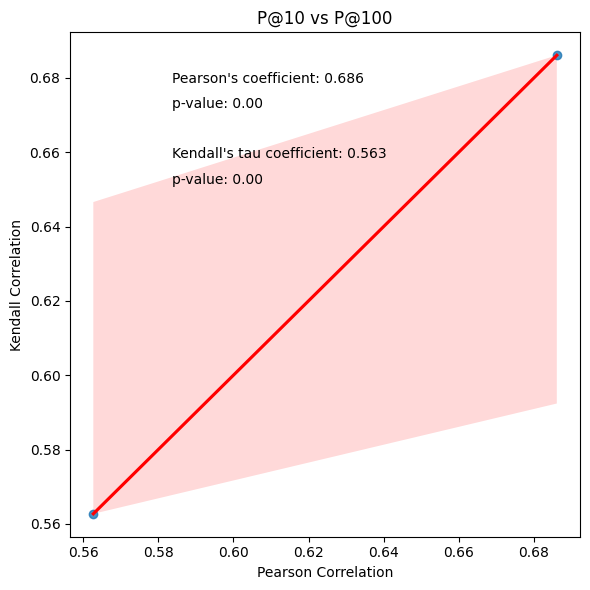

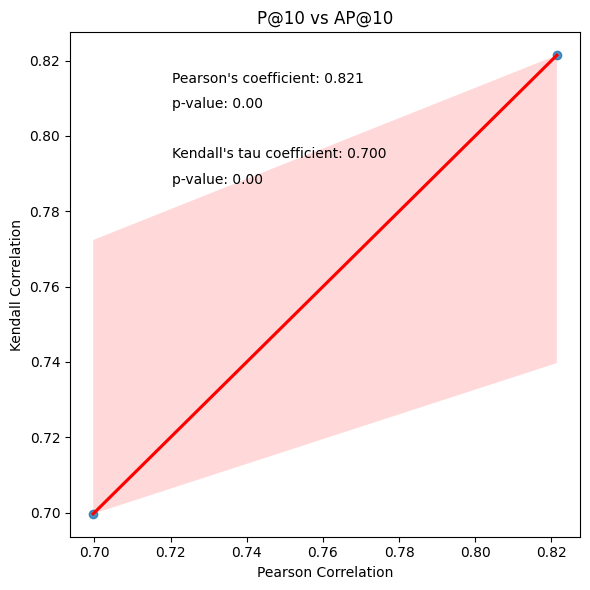

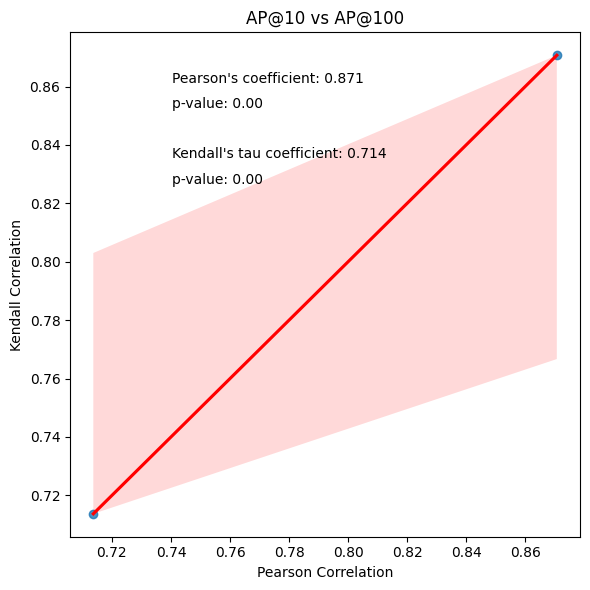

In [277]:
pearson_df = pd.DataFrame(pearson_data)
kendall_df = pd.DataFrame(kendall_data)

def plot_comparison(data1, data2, title):
    for i, metric in enumerate(data1['Evaluation Metrics']):
        fig, ax = plt.subplots(figsize=(6, 6))

        # Convert columns to numeric
        data1['Correlation Coefficient'] = pd.to_numeric(data1['Correlation Coefficient'])
        data2['Correlation Coefficient'] = pd.to_numeric(data2['Correlation Coefficient'])
        data1['p-value'] = pd.to_numeric(data1['p-value'])
        data2['p-value'] = pd.to_numeric(data2['p-value'])

        sns.regplot(x='Correlation Coefficient', y='Correlation Coefficient', data=pd.concat([data1.iloc[[i]], data2.iloc[[i]]]), ax=ax, line_kws={'color': 'red'})
        ax.set_title(metric)
        ax.set_xlabel('Pearson Correlation')
        ax.set_ylabel('Kendall Correlation')
        ax.text(0.2, 0.9, f"Pearson's coefficient: {data1['Correlation Coefficient'][i]:.3f}", transform=ax.transAxes)
        ax.text(0.2, 0.85, f"p-value: {data1['p-value'][i]:.2f}", transform=ax.transAxes)
        ax.text(0.2, 0.75, f"Kendall's tau coefficient: {data2['Correlation Coefficient'][i]:.3f}", transform=ax.transAxes)
        ax.text(0.2, 0.70, f"p-value: {data2['p-value'][i]:.2f}", transform=ax.transAxes)

        plt.tight_layout()
        plt.show()

# Plot comparison one by one
plot_comparison(pearson_df, kendall_df, 'Comparison between Pearson and Kendall Correlations for Evaluation Metrics')


<br>

<br>

#**5. Significance Testing**


In [281]:
from scipy.stats import ttest_rel

Precision @10

In [282]:
length = len(system_names)
count = 0

for i in range(length):
  system = system_names[i]

  #System A
  x = precision_10.iloc[:, i].tolist()
  # Ensure x is a list of floats
  x = [float(val) for val in x]

  for j in range(i + 1, length, 1):
    #System B
    y = precision_10.iloc[:, j].tolist()
    # Ensure y is a list of floats
    y = [float(val) for val in y]

    #Paired T-test
    t_statistic, p_value = ttest_rel(x,y)

    if p_value < 0.05:
      count +=1

print("Total number of significant pairs: ", count)


Total number of significant pairs:  65


Precision @100

In [284]:
length = len(system_names)
count = 0

for i in range(length):
  system = system_names[i]

  #System A
  x = precision_100.iloc[:, i].tolist()
  # Ensure x is a list of floats
  x = [float(val) for val in x]

  for j in range(i + 1, length, 1):
    #System B
    y = precision_100.iloc[:, j].tolist()
    # Ensure y is a list of floats
    y = [float(val) for val in y]

    #Paired T-test
    t_statistic, p_value = ttest_rel(x,y)

    if p_value < 0.05:
      count +=1

print("Total number of significant pairs: ", count)

Total number of significant pairs:  75


MAP @10

In [285]:
length = len(system_names)
count = 0

for i in range(length):
  system = system_names[i]

  #System A
  x = map_10_res_topics.iloc[:, i].tolist()
  for j in range(i + 1, length, 1):
    #System B
    y = map_10_res_topics.iloc[:, j].tolist()

    #Paired T-test
    t_statistic, p_value = ttest_rel(x,y)

    if p_value < 0.05:
      count +=1

print("Total number of significant pairs: ", count)

Total number of significant pairs:  54


MAP @100

In [286]:
length = len(system_names)
count = 0

for i in range(length):
  system = system_names[i]

  #System A
  x = map_100_res_topics.iloc[:, i].tolist()
  for j in range(i + 1, length, 1):
    #System B
    y = map_100_res_topics.iloc[:, j].tolist()

    #Paired T-test
    t_statistic, p_value = ttest_rel(x,y)

    if p_value < 0.05:
      count +=1

print("Total number of significant pairs: ", count)

Total number of significant pairs:  62


Paired T-Test

In [288]:
from scipy.stats import ttest_rel
import pandas as pd

# Assuming precision_10 is a pandas DataFrame

# Convert all columns to numeric, coercing errors to NaN
precision_10 = precision_10.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
precision_10 = precision_10.dropna()

In [289]:
length = len(system_names)
count = 0

for i in range(length):
  system = system_names[i]
  print("----------------")
  print("\nSystem: ", system)
  print()

  #System A
  x = precision_10.iloc[:, i].tolist()

  for j in range(i + 1, length, 1):
    #System B
    y = precision_10.iloc[:, j].tolist()

    #Paired T-test
    t_statistic, p_value = ttest_rel(x,y)

    print("=>", system_names[j])
    print(f"t-statistic: {t_statistic:.2f}")
    print(f"p-value: {p_value:.3f}")

    if p_value < 0.05:
      print("The difference is significant.")
      count +=1
    else:
      print("The difference is not significant.")

print()

----------------

System:  acsys8aln2

=> apl8ctd
t-statistic: 0.70
p-value: 0.487
The difference is not significant.
=> CL99SD
t-statistic: -6.12
p-value: 0.000
The difference is significant.
=> Dm8TFbn
t-statistic: 3.84
p-value: 0.000
The difference is significant.
=> fub99td
t-statistic: -0.94
p-value: 0.353
The difference is not significant.
=> ibmg99b
t-statistic: 1.02
p-value: 0.314
The difference is not significant.
=> GE8ATD3
t-statistic: -0.11
p-value: 0.912
The difference is not significant.
=> pir9Atd0
t-statistic: -0.34
p-value: 0.735
The difference is not significant.
=> mds08a4
t-statistic: 1.53
p-value: 0.132
The difference is not significant.
=> unc8al32
t-statistic: 4.80
p-value: 0.000
The difference is significant.
=> surfahi2
t-statistic: 4.32
p-value: 0.000
The difference is significant.
=> INQ601
t-statistic: 1.17
p-value: 0.247
The difference is not significant.
=> plt8ah3
t-statistic: 4.00
p-value: 0.000
The difference is significant.
=> orcl99man
t-statistic: -5

P @10

In [290]:
#pairwise t-tests
p_values = np.zeros((length, length))
t_values = np.zeros((length, length))
for i in range(length):
  for j in range(length):
    t_statistic, p_value = ttest_rel(precision_10.iloc[:, j].tolist(), precision_10.iloc[:, i].tolist())

    p_values[i, j] = p_value
    p_values[j, i] = np.nan

    t_values[i, j] = t_statistic
    t_values[j, i] = np.nan

In [291]:
#Convert p_values to a Pandas dataframe
df_p_values = pd.DataFrame(p_values, index=system_names, columns=system_names)

#Convert t_statistic to a Pandas dataframe
df_t_stat = pd.DataFrame(t_values, index=system_names, columns=system_names)

<br>

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<Axes: >

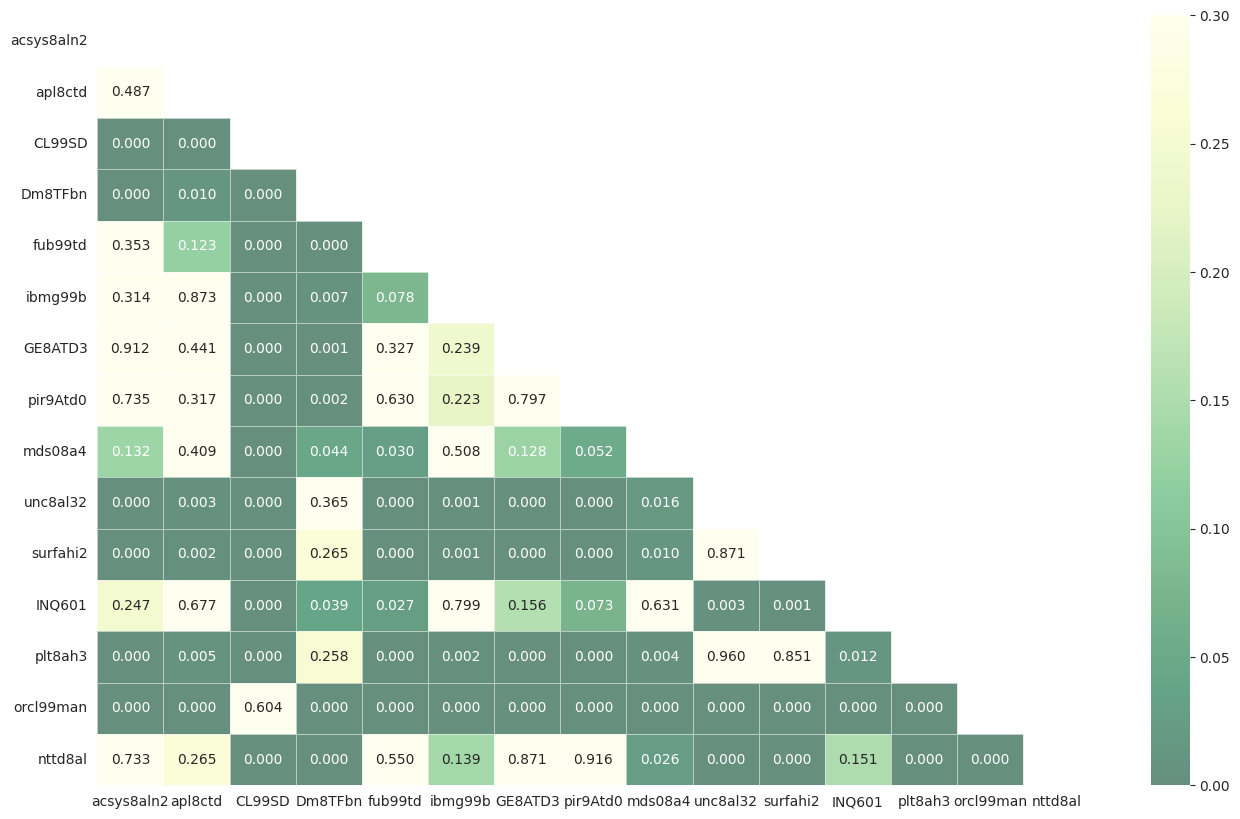

In [293]:
#p_value matrix
plt.figure(figsize = (16, 10), dpi = 100)
sns.set_style("white")
sns.heatmap(df_p_values, cmap ='YlGn_r', vmax=.3, annot=True, linewidths=0.5, fmt=".3f", alpha=0.6)

<Axes: >

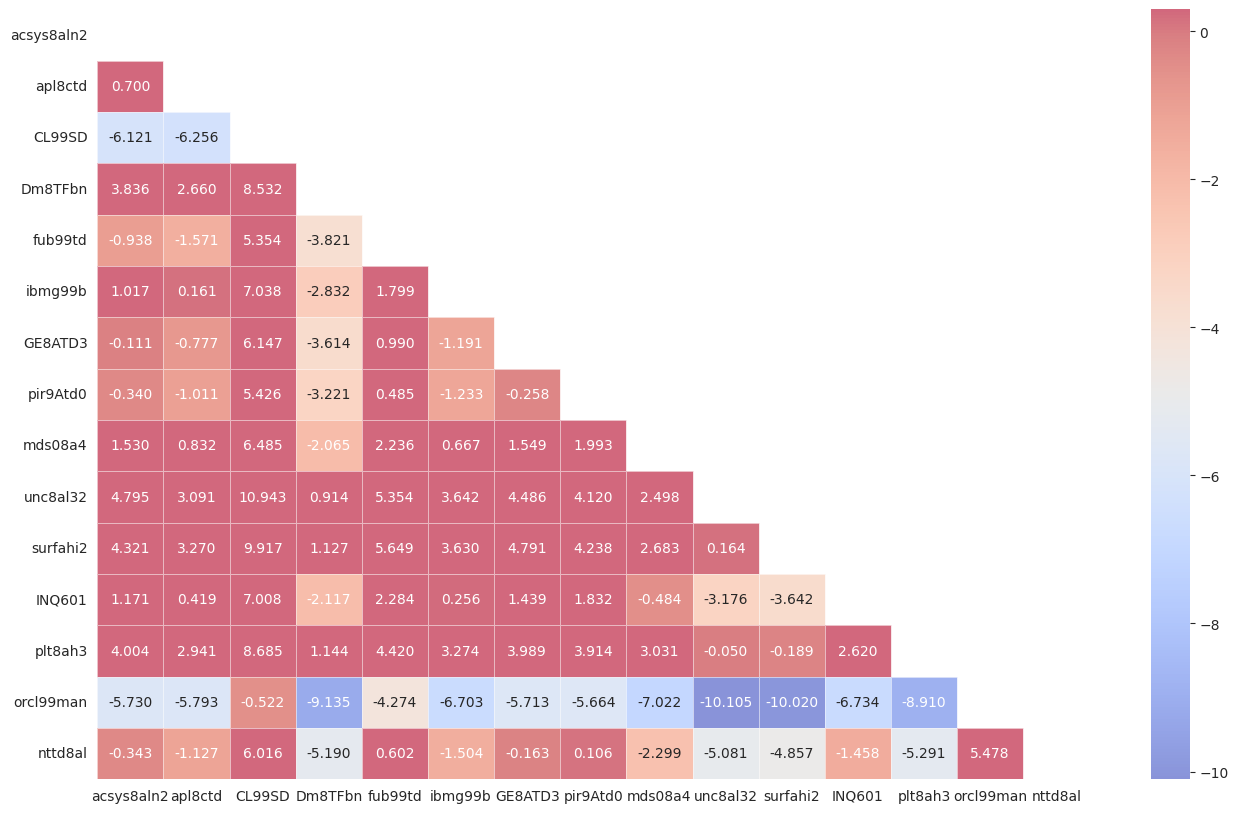

In [294]:
#significance testing matrix
plt.figure(figsize = (16, 10), dpi = 100)
sns.heatmap(df_t_stat, cmap ='coolwarm', vmax=.3, annot=True, linewidths=0.5, fmt=".3f", alpha=0.6)

P @100

In [296]:
# Convert all columns to numeric, coercing errors to NaN
precision_100 = precision_100.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
precision_100 = precision_100.dropna()

In [297]:
#pairwise t-tests
p_values = np.zeros((length, length))
t_values = np.zeros((length, length))
for i in range(length):
  for j in range(length):
    t_statistic, p_value = ttest_rel(precision_100.iloc[:, j].tolist(), precision_100.iloc[:, i].tolist())

    p_values[i, j] = p_value
    p_values[j, i] = np.nan

    t_values[i, j] = t_statistic
    t_values[j, i] = np.nan

In [298]:
#Convert p_values to a Pandas dataframe
df_p_values = pd.DataFrame(p_values, index=system_names, columns=system_names)

#Convert t_statistic to a Pandas dataframe
df_t_stat = pd.DataFrame(t_values, index=system_names, columns=system_names)

<Axes: >

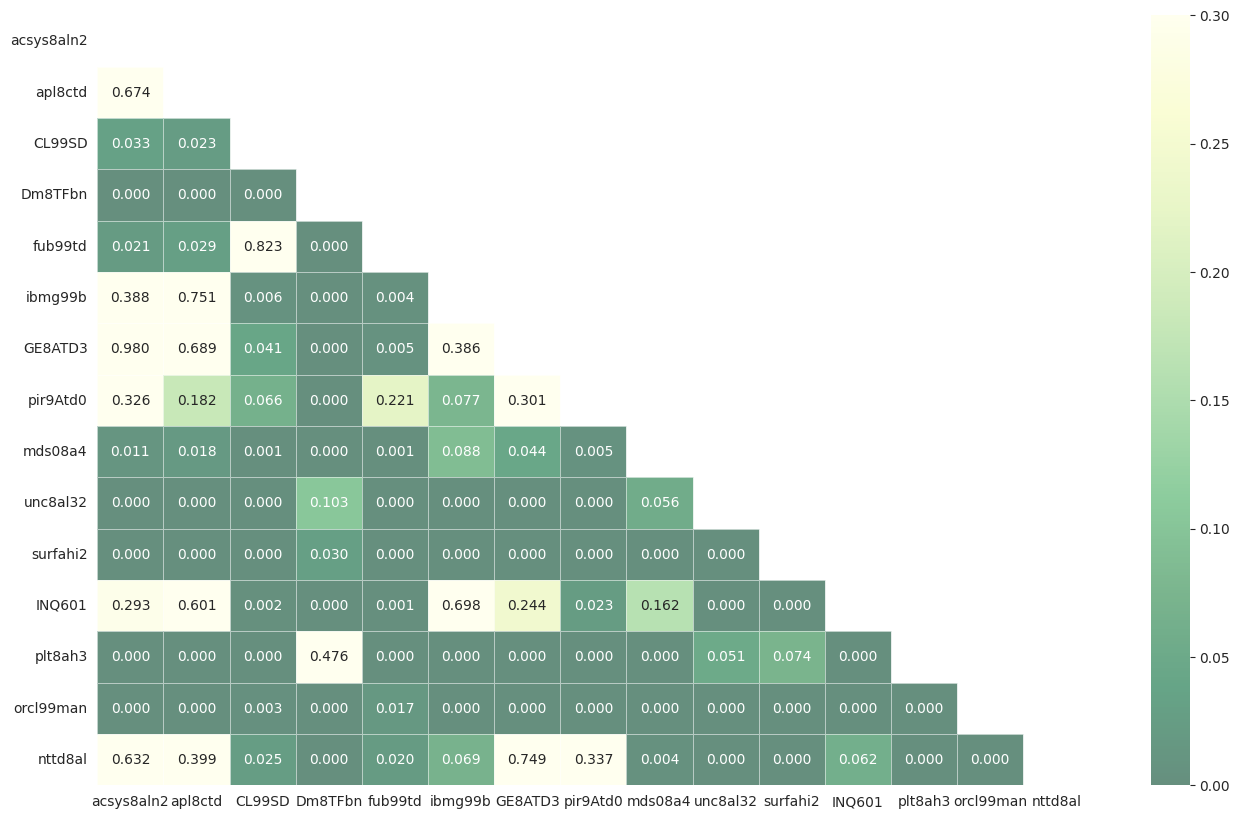

In [299]:
#p_value matrix
plt.figure(figsize = (16, 10), dpi = 100)
sns.set_style("white")
sns.heatmap(df_p_values, cmap ='YlGn_r', vmax=.3, annot=True, linewidths=0.5, fmt=".3f", alpha=0.6)

<Axes: >

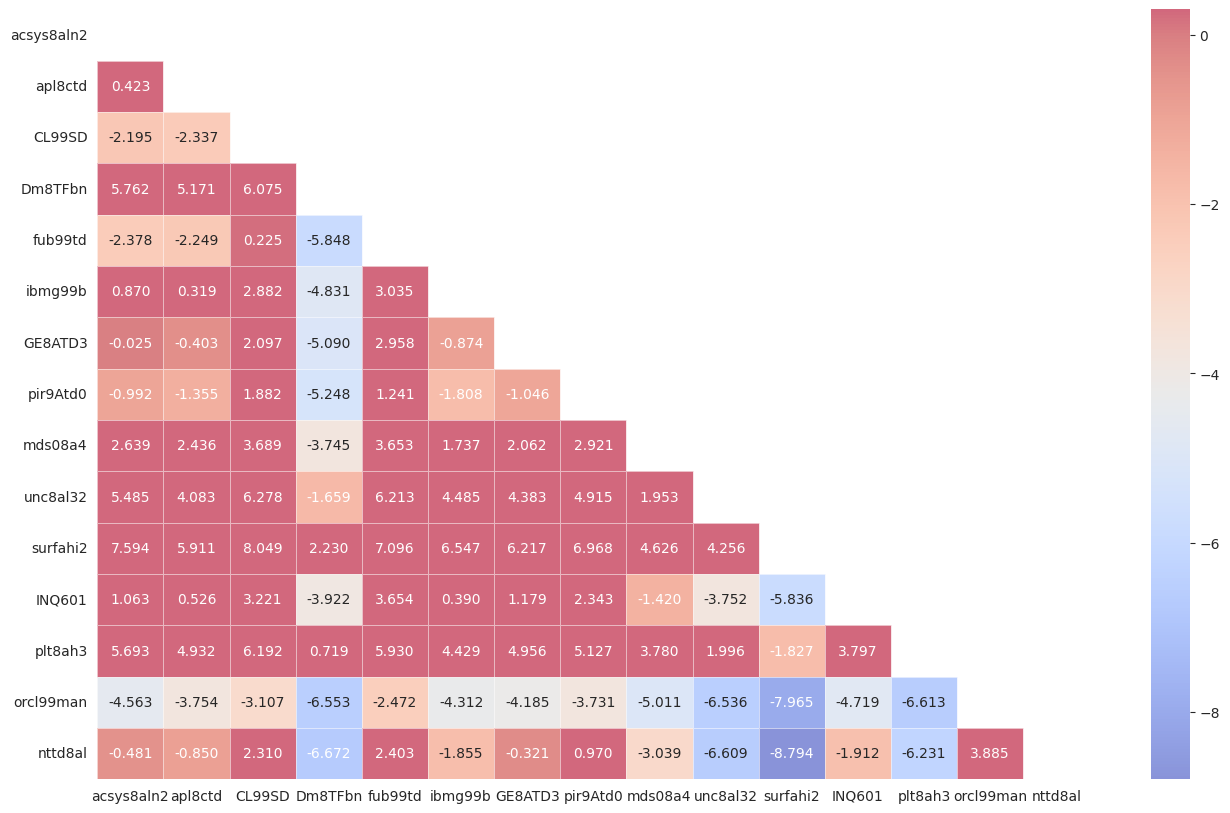

In [300]:
#significance testing matrix
plt.figure(figsize = (16, 10), dpi = 100)
sns.heatmap(df_t_stat, cmap ='coolwarm', vmax=.3, annot=True, linewidths=0.5, fmt=".3f", alpha=0.6)

MAP @10

In [301]:
#pairwise t-tests
p_values = np.zeros((length, length))
t_values = np.zeros((length, length))
for i in range(length):
  for j in range(length):
    t_statistic, p_value = ttest_rel(map_10_res_topics.iloc[:, j].tolist(), map_10_res_topics.iloc[:, i].tolist())

    p_values[i, j] = p_value
    p_values[j, i] = np.nan

    t_values[i, j] = t_statistic
    t_values[j, i] = np.nan

In [302]:
#Convert p_values to a Pandas dataframe
df_p_values = pd.DataFrame(p_values, index=system_names, columns=system_names)

#Convert t_statistic to a Pandas dataframe
df_t_stat = pd.DataFrame(t_values, index=system_names, columns=system_names)

<Axes: >

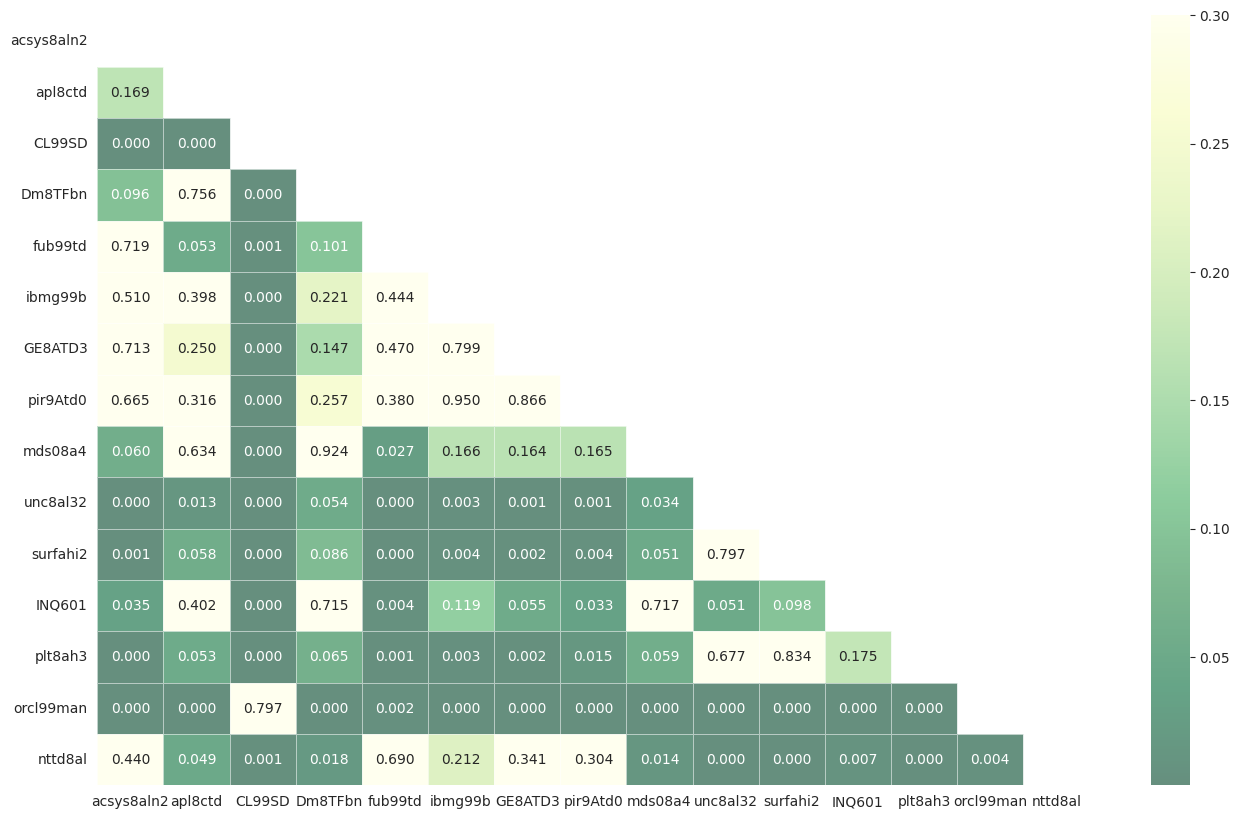

In [303]:
#p_value matrix
plt.figure(figsize = (16, 10), dpi = 100)
sns.set_style("white")
sns.heatmap(df_p_values, cmap ='YlGn_r', vmax=.3, annot=True, linewidths=0.5, fmt=".3f", alpha=0.6)

<Axes: >

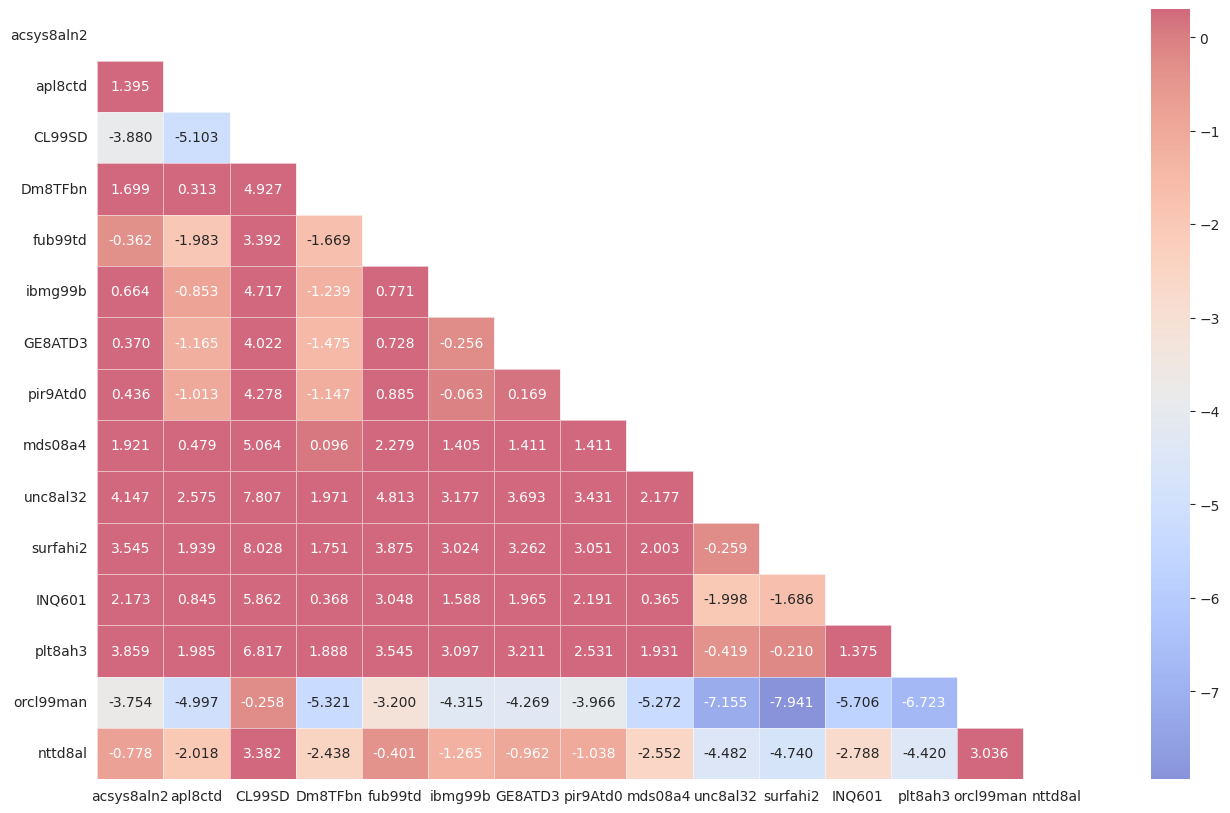

In [304]:
#significance testing matrix
plt.figure(figsize = (16, 10), dpi = 100)
sns.heatmap(df_t_stat, cmap ='coolwarm', vmax=.3, annot=True, linewidths=0.5, fmt=".3f", alpha=0.6)

MAP @100

In [305]:
#pairwise t-tests
p_values = np.zeros((length, length))
t_values = np.zeros((length, length))
for i in range(length):
  for j in range(length):
    t_statistic, p_value = ttest_rel(map_100_res_topics.iloc[:, j].tolist(), map_100_res_topics.iloc[:, i].tolist())

    p_values[i, j] = p_value
    p_values[j, i] = np.nan

    t_values[i, j] = t_statistic
    t_values[j, i] = np.nan

In [306]:
#Convert p_values to a Pandas dataframe
df_p_values = pd.DataFrame(p_values, index=system_names, columns=system_names)

#Convert t_statistic to a Pandas dataframe
df_t_stat = pd.DataFrame(t_values, index=system_names, columns=system_names)

<Axes: >

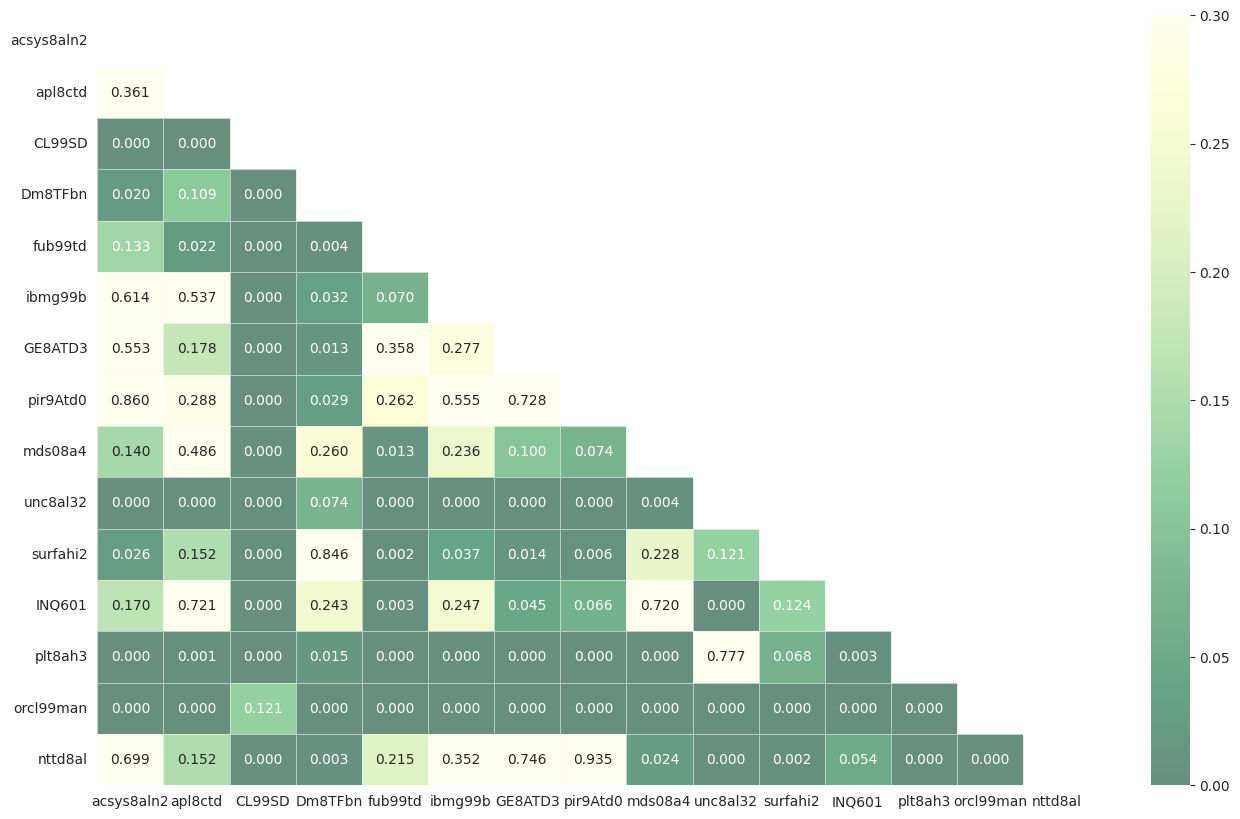

In [307]:
#p_value matrix
plt.figure(figsize = (16, 10), dpi = 100)
sns.set_style("white")
sns.heatmap(df_p_values, cmap ='YlGn_r', vmax=.3, annot=True, linewidths=0.5, fmt=".3f", alpha=0.6)

<Axes: >

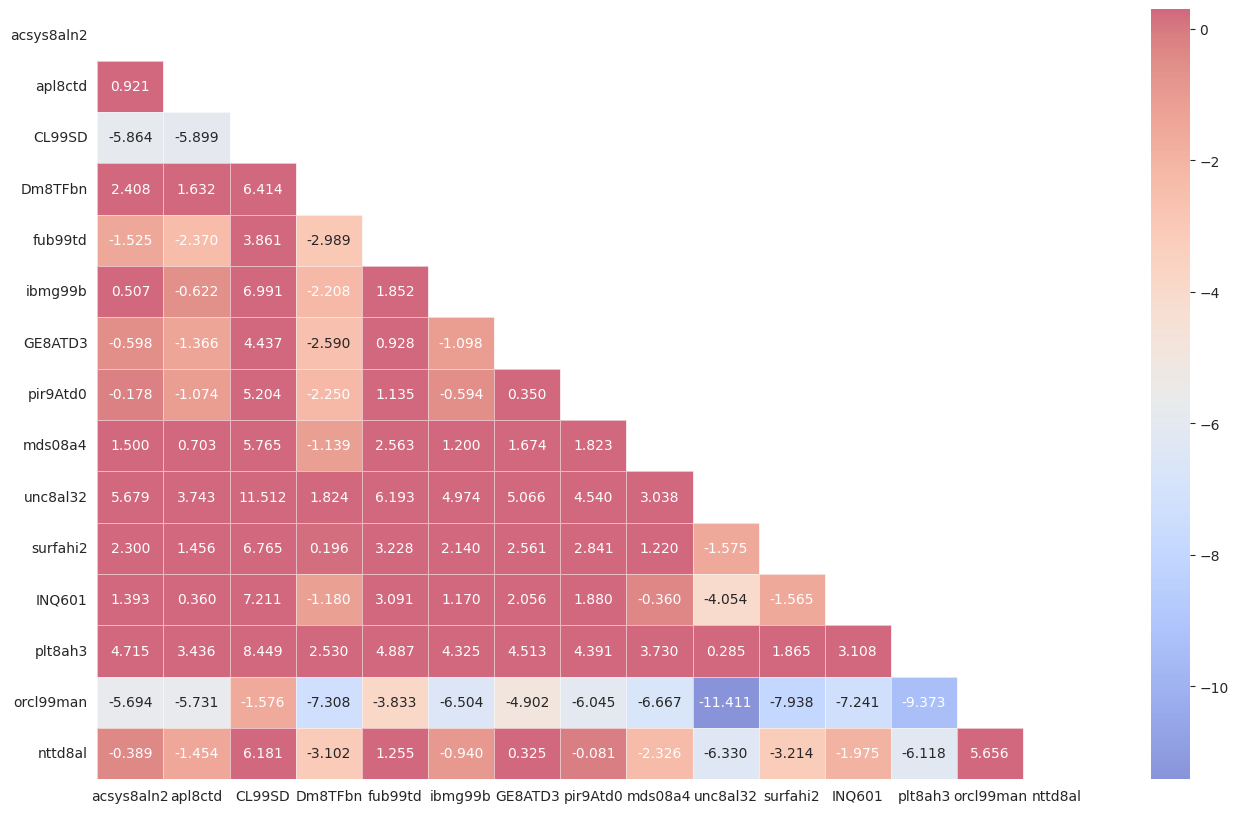

In [308]:
#significance testing matrix
plt.figure(figsize = (16, 10), dpi = 100)
sns.heatmap(df_t_stat, cmap ='coolwarm', vmax=.3, annot=True, linewidths=0.5, fmt=".3f", alpha=0.6)